Problem:
This business problem is a supervised learning example for a credit card company. The objective is to predict the probability of default (whether the customer will pay the credit card bill or not) based on the variables provided. There are multiple variables on the credit card account, purchase and delinquency information which can be used in the modelling.
PD modelling problems are meant for understanding the riskiness of the customers and how much credit is at stake in case the customer defaults. This is an extremely critical part in any organization that lends money [both secured and unsecured loans].


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_excel('PD_modelling_dataset.xlsx')

In [3]:
df

userid  default  acct_amt_added_12_24m  acct_days_in_dc_12_24m  \
0      4567129.0      0.0                    0.0                     0.0   
1      2635118.0      0.0                    0.0                     0.0   
2      4804232.0      0.0                    0.0                     0.0   
3      1442693.0      0.0                    0.0                     NaN   
4      4575322.0      0.0                    0.0                     0.0   
...          ...      ...                    ...                     ...   
99974  4648093.0      NaN                56102.0                     0.0   
99975  1247657.0      NaN                    0.0                     0.0   
99976        NaN      NaN                    NaN                     NaN   
99977        NaN      NaN                    NaN                     NaN   
99978        0.0  10000.0                    0.0                 11836.0   

       acct_days_in_rem_12_24m  acct_days_in_term_12_24m  \
0                          0.0                       0.0   
1                          0.0                       0.0   
2                          0.0                       0.0   
3                          NaN                       NaN   
4                          0.0                       0.0   
...                        ...                       ...   
99974                      0.0                       0.0   
99975                      0.0                       0.0   
99976                      NaN                       NaN   
99977                      NaN                       NaN   
99978                  11836.0                   11836.0   

       acct_incoming_debt_vs_paid_0_24m  acct_status  acct_worst_status_0_3m  \
0                              0.000000          1.0                     1.0   
1                                   NaN          1.0                     1.0   
2                                   NaN          NaN                     NaN   
3                                   NaN          NaN                     NaN   
4                                   NaN          NaN                     NaN   
...                                 ...          ...                     ...   
99974                          0.064175          1.0                     2.0   
99975                               NaN          1.0                     1.0   
99976                               NaN          NaN                     NaN   
99977                               NaN          NaN                     NaN   
99978                      59315.000000      54373.0                 54373.0   

       acct_worst_status_12_24m  ...  num_arch_ok_12_24m  num_arch_rem_0_12m  \
0                           NaN  ...                14.0                 0.0   
1                           1.0  ...                19.0                 3.0   
2                           NaN  ...                 0.0                 3.0   
3                           NaN  ...                21.0                 0.0   
4                           NaN  ...                 0.0                 0.0   
...                         ...  ...                 ...                 ...   
99974                       1.0  ...                 1.0                 0.0   
99975                       NaN  ...                 2.0                 1.0   
99976                       NaN  ...                 NaN                 NaN   
99977                       NaN  ...                 NaN                 NaN   
99978                   66761.0  ...                 0.0                 0.0   

       status_max_archived_0_6_months  status_max_archived_0_12_months  \
0                                 1.0                              1.0   
1                                 1.0                              2.0   
2                                 1.0                              2.0   
3                                 1.0                              1.0   
4                                 1.0                              1.0   
...       

In [4]:
df.head(10)

userid  default  acct_amt_added_12_24m  acct_days_in_dc_12_24m  \
0  4567129.0      0.0                    0.0                     0.0   
1  2635118.0      0.0                    0.0                     0.0   
2  4804232.0      0.0                    0.0                     0.0   
3  1442693.0      0.0                    0.0                     NaN   
4  4575322.0      0.0                    0.0                     0.0   
5  1534132.0      0.0                    0.0                     0.0   
6  1179589.0      0.0                    0.0                     0.0   
7  2182448.0      0.0                57229.0                     0.0   
8  1661559.0      0.0               148922.0                     0.0   
9  4628751.0      0.0                    0.0                     0.0   

   acct_days_in_rem_12_24m  acct_days_in_term_12_24m  \
0                      0.0                       0.0   
1                      0.0                       0.0   
2                      0.0                       0.0   
3                      NaN                       NaN   
4                      0.0                       0.0   
5                      0.0                       0.0   
6                    142.0                       0.0   
7                      0.0                       0.0   
8                     47.0                       0.0   
9                      0.0                       0.0   

   acct_incoming_debt_vs_paid_0_24m  acct_status  acct_worst_status_0_3m  \
0                          0.000000          1.0                     1.0   
1                               NaN          1.0                     1.0   
2                               NaN          NaN                     NaN   
3                               NaN          NaN                     NaN   
4                               NaN          NaN                     NaN   
5                               NaN          NaN                     NaN   
6                          0.000000          1.0                     2.0   
7                          0.232244          1.0                     1.0   
8                          0.969055          1.0                     2.0   
9                               NaN          NaN                     NaN   

   acct_worst_status_12_24m  ...  num_arch_ok_12_24m  num_arch_rem_0_12m  \
0                       NaN  ...                14.0                 0.0   
1                       1.0  ...                19.0                 3.0   
2                       NaN  ...                 0.0                 3.0   
3                       NaN  ...                21.0                 0.0   
4                       NaN  ...                 0.0                 0.0   
5                       NaN  ...                 0.0                 0.0   
6                       2.0  ...                 NaN                 NaN   
7                       1.0  ...               257.0                 0.0   
8                       2.0  ...                 2.0                 3.0   
9                       NaN  ...                10.0                 0.0   

   status_max_archived_0_6_months  status_max_archived_0_12_months  \
0                             1.0                              1.0   
1                             1.0                              2.0   
2                             1.0                              2.0   
3                             1.0                              1.0   
4                             1.0                              1.0   
5                             0.0                              0.0   
6                             NaN                              NaN   
7                             1.0                              1.0   
8                             2.0                              2.0   
9                             1.0                              1.0   

   status_max_archived_0_24_months recovery_debt sum_capital_paid_acct_0_12m  \
0                              1.0           0.0                       

In [5]:
df.tail(2)

userid  default  acct_amt_added_12_24m  acct_days_in_dc_12_24m  \
99977     NaN      NaN                    NaN                     NaN   
99978     0.0  10000.0                    0.0                 11836.0   

       acct_days_in_rem_12_24m  acct_days_in_term_12_24m  \
99977                      NaN                       NaN   
99978                  11836.0                   11836.0   

       acct_incoming_debt_vs_paid_0_24m  acct_status  acct_worst_status_0_3m  \
99977                               NaN          NaN                     NaN   
99978                           59315.0      54373.0                 54373.0   

       acct_worst_status_12_24m  ...  num_arch_ok_12_24m  num_arch_rem_0_12m  \
99977                       NaN  ...                 NaN                 NaN   
99978                   66761.0  ...                 0.0                 0.0   

       status_max_archived_0_6_months  status_max_archived_0_12_months  \
99977                             NaN                              NaN   
99978                             0.0                              0.0   

       status_max_archived_0_24_months recovery_debt  \
99977                              NaN           NaN   
99978                              0.0           0.0   

      sum_capital_paid_acct_0_12m  sum_capital_paid_acct_12_24m  \
99977                         NaN                           NaN   
99978                         0.0                           0.0   

       sum_paid_inv_0_12m  time_hours  
99977                 NaN         NaN  
99978                 0.0         0.0  

[2 rows x 36 columns]

Row 99978 is fully wrong....its better to drop it first for better analysis

In [6]:
df.drop(99978, inplace = True)
df.tail()

userid  default  acct_amt_added_12_24m  acct_days_in_dc_12_24m  \
99973  4333001.0      NaN                45671.0                     0.0   
99974  4648093.0      NaN                56102.0                     0.0   
99975  1247657.0      NaN                    0.0                     0.0   
99976        NaN      NaN                    NaN                     NaN   
99977        NaN      NaN                    NaN                     NaN   

       acct_days_in_rem_12_24m  acct_days_in_term_12_24m  \
99973                     20.0                       0.0   
99974                      0.0                       0.0   
99975                      0.0                       0.0   
99976                      NaN                       NaN   
99977                      NaN                       NaN   

       acct_incoming_debt_vs_paid_0_24m  acct_status  acct_worst_status_0_3m  \
99973                          0.705078          2.0                     2.0   
99974                          0.064175          1.0                     2.0   
99975                               NaN          1.0                     1.0   
99976                               NaN          NaN                     NaN   
99977                               NaN          NaN                     NaN   

       acct_worst_status_12_24m  ...  num_arch_ok_12_24m  num_arch_rem_0_12m  \
99973                       2.0  ...                 0.0                 0.0   
99974                       1.0  ...                 1.0                 0.0   
99975                       NaN  ...                 2.0                 1.0   
99976                       NaN  ...                 NaN                 NaN   
99977                       NaN  ...                 NaN                 NaN   

       status_max_archived_0_6_months  status_max_archived_0_12_months  \
99973                             0.0                              0.0   
99974                             1.0                              1.0   
99975                             2.0                              2.0   
99976                             NaN                              NaN   
99977                             NaN                              NaN   

       status_max_archived_0_24_months recovery_debt  \
99973                              0.0           0.0   
99974                              1.0           0.0   
99975                              2.0           0.0   
99976                              NaN           NaN   
99977                              NaN           NaN   

      sum_capital_paid_acct_0_12m  sum_capital_paid_acct_12_24m  \
99973                     17447.0                       19627.0   
99974                     18339.0                       56180.0   
99975                         0.0                           0.0   
99976                         NaN                           NaN   
99977                         NaN                           NaN   

       sum_paid_inv_0_12m  time_hours  
99973              3100.0    2.185278  
99974             34785.0    9.725278  
99975             30602.0   11.585278  
99976                 NaN         NaN  
99977                 NaN         NaN  

[5 rows x 36 columns]

In [7]:
df.shape

(99978, 36)

In [8]:
df.columns

Index(['userid', 'default', 'acct_amt_added_12_24m', 'acct_days_in_dc_12_24m',
       'acct_days_in_rem_12_24m', 'acct_days_in_term_12_24m',
       'acct_incoming_debt_vs_paid_0_24m', 'acct_status',
       'acct_worst_status_0_3m', 'acct_worst_status_12_24m',
       'acct_worst_status_3_6m', 'acct_worst_status_6_12m', 'age',
       'avg_payment_span_0_12m', 'avg_payment_span_0_3m', 'merchant_category',
       'merchant_group', 'has_paid', 'max_paid_inv_0_12m',
       'max_paid_inv_0_24m', 'name_in_email',
       'num_active_div_by_paid_inv_0_12m', 'num_active_inv',
       'num_arch_dc_0_12m', 'num_arch_dc_12_24m', 'num_arch_ok_0_12m',
       'num_arch_ok_12_24m', 'num_arch_rem_0_12m',
       'status_max_archived_0_6_months', 'status_max_archived_0_12_months',
       'status_max_archived_0_24_months', 'recovery_debt',
       'sum_capital_paid_acct_0_12m', 'sum_capital_paid_acct_12_24m',
       'sum_paid_inv_0_12m', 'time_hours'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99978 entries, 0 to 99977
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   userid                            99976 non-null  float64
 1   default                           89976 non-null  float64
 2   acct_amt_added_12_24m             99976 non-null  float64
 3   acct_days_in_dc_12_24m            88140 non-null  float64
 4   acct_days_in_rem_12_24m           88140 non-null  float64
 5   acct_days_in_term_12_24m          88140 non-null  float64
 6   acct_incoming_debt_vs_paid_0_24m  40661 non-null  float64
 7   acct_status                       45603 non-null  float64
 8   acct_worst_status_0_3m            45603 non-null  float64
 9   acct_worst_status_12_24m          33215 non-null  float64
 10  acct_worst_status_3_6m            42274 non-null  float64
 11  acct_worst_status_6_12m           39626 non-null  float64
 12  age 

In [10]:
df.replace('NA', np.nan, inplace=True)

In [11]:
df.duplicated().sum()

1

In [12]:
df.describe(include="all").T

count unique                        top  \
userid                            99976.0    NaN                        NaN   
default                           89976.0    NaN                        NaN   
acct_amt_added_12_24m             99976.0    NaN                        NaN   
acct_days_in_dc_12_24m            88140.0    NaN                        NaN   
acct_days_in_rem_12_24m           88140.0    NaN                        NaN   
acct_days_in_term_12_24m          88140.0    NaN                        NaN   
acct_incoming_debt_vs_paid_0_24m  40661.0    NaN                        NaN   
acct_status                       45603.0    NaN                        NaN   
acct_worst_status_0_3m            45603.0    NaN                        NaN   
acct_worst_status_12_24m          33215.0    NaN                        NaN   
acct_worst_status_3_6m            42274.0    NaN                        NaN   
acct_worst_status_6_12m           39626.0    NaN                        NaN   
age                               99976.0    NaN                        NaN   
avg_payment_span_0_12m            76140.0    NaN                        NaN   
avg_payment_span_0_3m             50671.0    NaN                        NaN   
merchant_category                   99976     57  Diversified entertainment   
merchant_group                      99967     12              Entertainment   
has_paid                          88942.0    NaN                        NaN   
max_paid_inv_0_12m                88942.0    NaN                        NaN   
max_paid_inv_0_24m                88942.0    NaN                        NaN   
name_in_email                       88942      8                        F+L   
num_active_div_by_paid_inv_0_12m  70051.0    NaN                        NaN   
num_active_inv                    88942.0    NaN                        NaN   
num_arch_dc_0_12m                 88942.0    NaN                        NaN   
num_arch_dc_12_24m                88942.0    NaN                        NaN   
num_arch_ok_0_12m                 88942.0    NaN                        NaN   
num_arch_ok_12_24m                88942.0    NaN                        NaN   
num_arch_rem_0_12m                88942.0    NaN                        NaN   
status_max_archived_0_6_months    88942.0    NaN                        NaN   
status_max_archived_0_12_months   88942.0    NaN                        NaN   
status_max_archived_0_24_months   88942.0    NaN                        NaN   
recovery_debt                     88942.0    NaN                        NaN   
sum_capital_paid_acct_0_12m       88942.0    NaN                        NaN   
sum_capital_paid_acct_12_24m      88942.0    NaN                        NaN   
sum_paid_inv_0_12m                88942.0    NaN                        NaN   
time_hours                        88942.0    NaN                        NaN   

                                   freq            mean             std  \
userid                              NaN  2998976.731145  1154177.403854   
default                             NaN        0.014315        0.118786   
acct_amt_added_12_24m               NaN    12255.149516    35481.483737   
acct_days_in_dc_12_24m              NaN        0.223043        5.808117   
acct_days_in_rem_12_24m             NaN        5.044622       22.863971   
acct_days_in_term_12_24m            NaN        0.286896         2.92991   
acct_incoming_debt_vs_paid_0_24m    NaN        1.331292       26.482299   
acct_status                         NaN        1.042168        0.202713   
acct_worst_status_0_3m              NaN        1.172905        0.420142   
acct_worst_status_12_24m            NaN        1.337348        0.575043   
acct_worst_status_3_6m              NaN        1.185291        0.443309   
acct_worst_status_6_12m             NaN        1.253142        0.505559   
age                                 NaN       36.016284       13.001306   
avg_payment_span_0_12m              NaN       17.971473       

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()

0

In [15]:
df['default'].value_counts()

default
0.0    88688
1.0     1288
Name: count, dtype: int64

In [16]:
df.drop('userid', axis = 1, inplace = True)

In [17]:
df.drop('name_in_email', axis = 1, inplace = True)

In [18]:
df['has_paid']

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
99972    1.0
99973    1.0
99974    1.0
99975    1.0
99976    NaN
Name: has_paid, Length: 99977, dtype: float64

In [19]:
df["has_paid"].value_counts()

has_paid
1.0    77002
0.0    11940
Name: count, dtype: int64

In [20]:
df["acct_status"].value_counts()

acct_status
1.0    43693
2.0     1900
3.0        7
4.0        3
Name: count, dtype: int64

In [21]:
# Check the number of null values in acct_status
null_count = df['acct_status'].isnull().sum()
print("Number of null values in acct_status:", null_count)


Number of null values in acct_status: 54374


In [22]:

# Convert float values in has_paid to integers
df['has_paid'] = df['has_paid'].astype('Int64')

# Replace non-binary values in has_paid with NaN
df.loc[~df['has_paid'].isin([0, 1]), 'has_paid'] = np.nan

# Convert acct_status to integer type
df['acct_status'] = df['acct_status'].astype('Int64')

# Replace unexpected values in acct_status with NaN
unexpected_values = [2, 3, 4]
df.loc[df['acct_status'].isin(unexpected_values), 'acct_status'] = np.nan



In [23]:
from sklearn.impute import SimpleImputer

# Initialize SimpleImputer with 'most_frequent' strategy
imputer = SimpleImputer(strategy='most_frequent')

# Impute missing values for has_paid column
df['has_paid'] = imputer.fit_transform(df[['has_paid']])

# Impute missing values for acct_status column
df['acct_status'] = imputer.fit_transform(df[['acct_status']])


In [24]:
df['acct_status'].value_counts()

acct_status
1.0    99977
Name: count, dtype: int64

In [25]:
df.drop('acct_status', axis = 1, inplace = True)

In [26]:
df['has_paid'].value_counts()

has_paid
1.0    88037
0.0    11940
Name: count, dtype: int64

In [27]:
df["merchant_category"].value_counts()

merchant_category
Diversified entertainment                                  38614
Youthful Shoes & Clothing                                  11755
Books & Magazines                                           9363
General Shoes & Clothing                                    4597
Concept stores & Miscellaneous                              4406
Sports gear & Outdoor                                       3712
Dietary supplements                                         3101
Diversified children products                               2994
Diversified electronics                                     1844
Prints & Photos                                             1675
Children Clothes & Nurturing products                       1500
Pet supplies                                                1315
Electronic equipment & Related accessories                  1037
Jewelry & Watches                                            911
Hobby articles                                               910
Prescri

In [28]:
df["merchant_group"].value_counts()

merchant_group
Entertainment            48779
Clothing & Shoes         16728
Leisure                  11025
Health & Beauty           7356
Children Products         5108
Home & Garden             3718
Electronics               3034
Intangible products       1122
Jewelry & Accessories     1058
Automotive Products        937
Erotic Materials           747
Food & Beverage            355
Name: count, dtype: int64

In [29]:
for i in df.columns:
    print(df[i].value_counts())

default
0.0    88688
1.0     1288
Name: count, dtype: int64
acct_amt_added_12_24m
0.0        71362
50.0          34
30.0          34
90.0          25
60.0          22
           ...  
11310.0        1
10441.0        1
35425.0        1
80124.0        1
45671.0        1
Name: count, Length: 23721, dtype: int64
acct_days_in_dc_12_24m
0.0      87879
9.0         11
28.0        10
42.0         9
67.0         9
         ...  
163.0        1
92.0         1
74.0         1
119.0        1
365.0        1
Name: count, Length: 127, dtype: int64
acct_days_in_rem_12_24m
0.0      78522
1.0        529
2.0        315
21.0       258
15.0       236
         ...  
341.0        1
228.0        1
324.0        1
226.0        1
234.0        1
Name: count, Length: 282, dtype: int64
acct_days_in_term_12_24m
0.0     86932
34.0      274
7.0        56
1.0        52
2.0        49
        ...  
68.0        1
53.0        1
36.0        1
45.0        1
44.0        1
Name: count, Length: 64, dtype: int64
acct_incoming_debt

In [30]:
df

default  acct_amt_added_12_24m  acct_days_in_dc_12_24m  \
0          0.0                    0.0                     0.0   
1          0.0                    0.0                     0.0   
2          0.0                    0.0                     0.0   
3          0.0                    0.0                     NaN   
4          0.0                    0.0                     0.0   
...        ...                    ...                     ...   
99972      NaN                    0.0                     0.0   
99973      NaN                45671.0                     0.0   
99974      NaN                56102.0                     0.0   
99975      NaN                    0.0                     0.0   
99976      NaN                    NaN                     NaN   

       acct_days_in_rem_12_24m  acct_days_in_term_12_24m  \
0                          0.0                       0.0   
1                          0.0                       0.0   
2                          0.0                       0.0   
3                          NaN                       NaN   
4                          0.0                       0.0   
...                        ...                       ...   
99972                      0.0                       0.0   
99973                     20.0                       0.0   
99974                      0.0                       0.0   
99975                      0.0                       0.0   
99976                      NaN                       NaN   

       acct_incoming_debt_vs_paid_0_24m  acct_worst_status_0_3m  \
0                              0.000000                     1.0   
1                                   NaN                     1.0   
2                                   NaN                     NaN   
3                                   NaN                     NaN   
4                                   NaN                     NaN   
...                                 ...                     ...   
99972                          0.004044                     1.0   
99973                          0.705078                     2.0   
99974                          0.064175                     2.0   
99975                               NaN                     1.0   
99976                               NaN                     NaN   

       acct_worst_status_12_24m  acct_worst_status_3_6m  \
0                           NaN                     1.0   
1                           1.0                     1.0   
2                           NaN                     NaN   
3                           NaN                     NaN   
4                           NaN                     NaN   
...                         ...                     ...   
99972                       NaN                     1.0   
99973                       2.0                     1.0   
99974                       1.0                     2.0   
99975                       NaN                     1.0   
99976                       NaN                     NaN   

       acct_worst_status_6_12m  ...  num_arch_ok_12_24m  num_arch_rem_0_12m  \
0                          NaN  ...                14.0                 0.0   
1                          1.0  ...                19.0                 3.0   
2                          NaN  ...                 0.0                 3.0   
3                          NaN  ...                21.0                 0.0   
4                          NaN  ...                 0.0                 0.0   
...                        ...  ...                 ...                 ...   
99972                      1.0  ...                 3.0                 0.0   
99973                      1.0  ...                 0.0                 0.0   
99974                      2.0  ...                 1.0                 0.0   
99975                      NaN  ...                 2.0                 1.0   
99976                      NaN  ...                 NaN                 NaN   

       status_max_archived_0_6_months stat

In [31]:
df.isnull().sum()

default                             10001
acct_amt_added_12_24m                   1
acct_days_in_dc_12_24m              11837
acct_days_in_rem_12_24m             11837
acct_days_in_term_12_24m            11837
acct_incoming_debt_vs_paid_0_24m    59316
acct_worst_status_0_3m              54374
acct_worst_status_12_24m            66762
acct_worst_status_3_6m              57703
acct_worst_status_6_12m             60351
age                                     1
avg_payment_span_0_12m              23837
avg_payment_span_0_3m               49306
merchant_category                       1
merchant_group                         10
has_paid                                0
max_paid_inv_0_12m                  11035
max_paid_inv_0_24m                  11035
num_active_div_by_paid_inv_0_12m    29926
num_active_inv                      11035
num_arch_dc_0_12m                   11035
num_arch_dc_12_24m                  11035
num_arch_ok_0_12m                   11035
num_arch_ok_12_24m                

In [32]:
df.isnull().sum()/df.isnull().sum().sum()*100
#This code divides the number of missing values in each column by the total number of missing values in the entire DataFrame and then multiplies by 100 to get the percentage

default                              1.603598
acct_amt_added_12_24m                0.000160
acct_days_in_dc_12_24m               1.897989
acct_days_in_rem_12_24m              1.897989
acct_days_in_term_12_24m             1.897989
acct_incoming_debt_vs_paid_0_24m     9.510951
acct_worst_status_0_3m               8.718533
acct_worst_status_12_24m            10.704871
acct_worst_status_3_6m               9.252317
acct_worst_status_6_12m              9.676907
age                                  0.000160
avg_payment_span_0_12m               3.822115
avg_payment_span_0_3m                7.905910
merchant_category                    0.000160
merchant_group                       0.001603
has_paid                             0.000000
max_paid_inv_0_12m                   1.769394
max_paid_inv_0_24m                   1.769394
num_active_div_by_paid_inv_0_12m     4.798448
num_active_inv                       1.769394
num_arch_dc_0_12m                    1.769394
num_arch_dc_12_24m                

In [33]:
print('PERCENT OF MISSING VALUES TO THE WHOLE DATA --->')
print('')
round(df.isna().sum()*100/df.shape[0], 2)

PERCENT OF MISSING VALUES TO THE WHOLE DATA --->



default                             10.00
acct_amt_added_12_24m                0.00
acct_days_in_dc_12_24m              11.84
acct_days_in_rem_12_24m             11.84
acct_days_in_term_12_24m            11.84
acct_incoming_debt_vs_paid_0_24m    59.33
acct_worst_status_0_3m              54.39
acct_worst_status_12_24m            66.78
acct_worst_status_3_6m              57.72
acct_worst_status_6_12m             60.36
age                                  0.00
avg_payment_span_0_12m              23.84
avg_payment_span_0_3m               49.32
merchant_category                    0.00
merchant_group                       0.01
has_paid                             0.00
max_paid_inv_0_12m                  11.04
max_paid_inv_0_24m                  11.04
num_active_div_by_paid_inv_0_12m    29.93
num_active_inv                      11.04
num_arch_dc_0_12m                   11.04
num_arch_dc_12_24m                  11.04
num_arch_ok_0_12m                   11.04
num_arch_ok_12_24m                

In [34]:
print('Percent of Total Missing Values in the data =' ,(df.isna().sum().sum()*100/df.size).round(2), "%")

Percent of Total Missing Values in the data = 18.9 %


In [35]:
(df.drop('default', axis=1)==0).sum().sort_values(ascending=False)

recovery_debt                       88747
acct_days_in_dc_12_24m              87879
acct_days_in_term_12_24m            86932
num_arch_dc_12_24m                  85392
num_arch_dc_0_12m                   85142
acct_days_in_rem_12_24m             78522
acct_amt_added_12_24m               71362
num_arch_rem_0_12m                  67808
sum_capital_paid_acct_12_24m        66462
num_active_inv                      61129
sum_capital_paid_acct_0_12m         58715
num_active_div_by_paid_inv_0_12m    44049
num_arch_ok_12_24m                  31910
status_max_archived_0_6_months      30587
num_arch_ok_0_12m                   22790
status_max_archived_0_12_months     19880
max_paid_inv_0_12m                  17846
sum_paid_inv_0_12m                  17846
status_max_archived_0_24_months     15204
max_paid_inv_0_24m                  14268
acct_incoming_debt_vs_paid_0_24m    13072
has_paid                            11940
avg_payment_span_0_3m                 802
avg_payment_span_0_12m            

In [36]:
round(((df.drop('default', axis=1)==0).sum())*100/df.shape[0], 2).sort_values(ascending=False)

recovery_debt                       88.77
acct_days_in_dc_12_24m              87.90
acct_days_in_term_12_24m            86.95
num_arch_dc_12_24m                  85.41
num_arch_dc_0_12m                   85.16
acct_days_in_rem_12_24m             78.54
acct_amt_added_12_24m               71.38
num_arch_rem_0_12m                  67.82
sum_capital_paid_acct_12_24m        66.48
num_active_inv                      61.14
sum_capital_paid_acct_0_12m         58.73
num_active_div_by_paid_inv_0_12m    44.06
num_arch_ok_12_24m                  31.92
status_max_archived_0_6_months      30.59
num_arch_ok_0_12m                   22.80
status_max_archived_0_12_months     19.88
max_paid_inv_0_12m                  17.85
sum_paid_inv_0_12m                  17.85
status_max_archived_0_24_months     15.21
max_paid_inv_0_24m                  14.27
acct_incoming_debt_vs_paid_0_24m    13.08
has_paid                            11.94
avg_payment_span_0_3m                0.80
avg_payment_span_0_12m            

In [37]:
((df.drop('default',axis=1)==0).sum().sum())*100/df.drop('default', axis=1).size

33.719755543775065

In [38]:
((df.drop(['default','has_paid'], axis=1) == 0).sum().sum()) * 100 / df.drop(['default', 'has_paid'], axis=1).size

34.42223969577519

In [39]:
zeros_per_row = (df.drop(['default', 'has_paid'], axis=1) == 0).sum(axis=1)

In [40]:
zeros_per_row

0        11
1        11
2        10
3         7
4        13
         ..
99972    12
99973    12
99974     9
99975    11
99976     0
Length: 99977, dtype: int64

In [41]:
rows_with_more_than_15_zeros = df[zeros_per_row > 15]

In [42]:
rows_with_more_than_15_zeros

default  acct_amt_added_12_24m  acct_days_in_dc_12_24m  \
5          0.0                    0.0                     0.0   
11         0.0                    0.0                     NaN   
15         0.0                    0.0                     0.0   
25         0.0                    0.0                     0.0   
28         0.0                    0.0                     0.0   
...        ...                    ...                     ...   
99942      NaN                    0.0                     0.0   
99943      NaN                    0.0                     0.0   
99961      NaN                    0.0                     NaN   
99963      NaN                    0.0                     0.0   
99964      NaN                    0.0                     0.0   

       acct_days_in_rem_12_24m  acct_days_in_term_12_24m  \
5                          0.0                       0.0   
11                         NaN                       NaN   
15                         0.0                       0.0   
25                         0.0                       0.0   
28                         0.0                       0.0   
...                        ...                       ...   
99942                      0.0                       0.0   
99943                      0.0                       0.0   
99961                      NaN                       NaN   
99963                      0.0                       0.0   
99964                      0.0                       0.0   

       acct_incoming_debt_vs_paid_0_24m  acct_worst_status_0_3m  \
5                                   NaN                     NaN   
11                                  NaN                     NaN   
15                                  NaN                     NaN   
25                                  NaN                     NaN   
28                                  NaN                     NaN   
...                                 ...                     ...   
99942                               NaN                     NaN   
99943                               NaN                     NaN   
99961                               NaN                     NaN   
99963                               NaN                     NaN   
99964                               NaN                     NaN   

       acct_worst_status_12_24m  acct_worst_status_3_6m  \
5                           NaN                     NaN   
11                          NaN                     NaN   
15                          NaN                     NaN   
25                          NaN                     NaN   
28                          NaN                     NaN   
...                         ...                     ...   
99942                       NaN                     NaN   
99943                       NaN                     NaN   
99961                       NaN                     NaN   
99963                       NaN                     NaN   
99964                       NaN                     NaN   

       acct_worst_status_6_12m  ...  num_arch_ok_12_24m  num_arch_rem_0_12m  \
5                          NaN  ...                 0.0                 0.0   
11                         NaN  ...                 0.0                 0.0   
15                         NaN  ...                 0.0                 0.0   
25                         NaN  ...                 0.0                 0.0   
28                         NaN  ...                 0.0                 0.0   
...                        ...  ...                 ...                 ...   
99942                      NaN  ...                 0.0                 0.0   
99943                      NaN  ...                 0.0                 0.0   
99961                      NaN  ...                 0.0                 0.0   
99963                      NaN  ...                 0.0                 0.0   
99964                      NaN  ...                 0.0                 0.0   

       status_max_archived_0_6_months stat

In [43]:
# Calculate percentage of missing values for each column
missing_percent = (df.isnull().sum() / len(df)) * 100

# Identify columns with missing values exceeding 23%
columns_to_drop = missing_percent[missing_percent > 23].index

# Drop columns with missing values exceeding 23%
df.drop(columns=columns_to_drop, inplace=True)

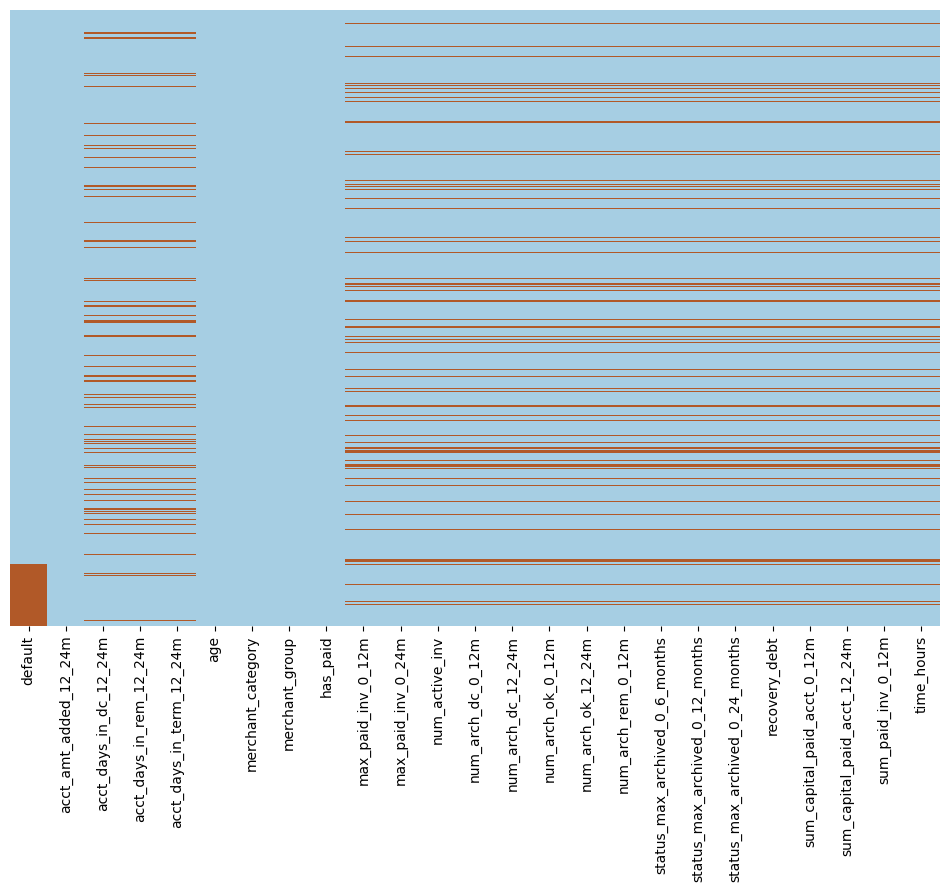

In [44]:
plt.figure(figsize = (12,8))
sns.heatmap(df.isnull(), cbar = False, cmap = 'Paired', yticklabels = False)
plt.savefig('missing_vis.jpg', bbox_inches='tight');
plt.show();

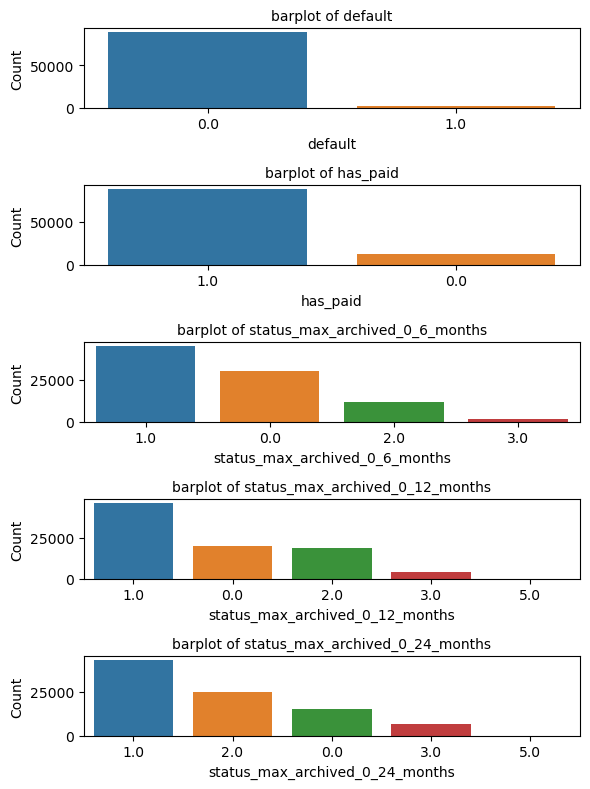

In [45]:
cat = ['default','has_paid','status_max_archived_0_6_months',
       'status_max_archived_0_12_months','status_max_archived_0_24_months']

plt.figure(figsize=(6,8))
a=1
for i in cat:
    plt.subplot(5,1,a)
    a=a+1
    sns.countplot(data=df, x=df[i], order=df[i].value_counts().sort_values(ascending=False).index)
    plt.title('barplot of {}'.format(i),fontsize=10)
    plt.xlabel(i)
    plt.ylabel('Count') 
    plt.tick_params(axis='both', which='both') 
    plt.tight_layout()

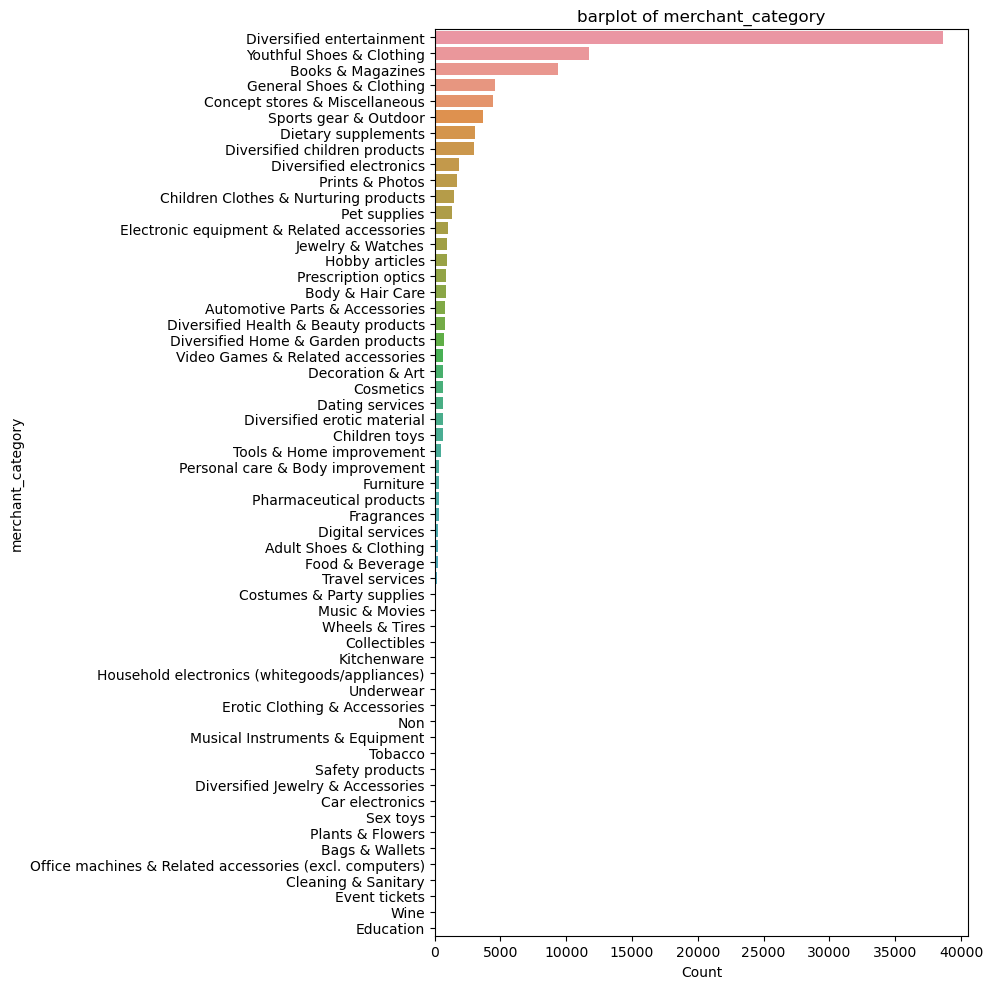

In [46]:
plt.figure(figsize=(10,10))
sns.countplot(data=df, y='merchant_category', order=df['merchant_category'].value_counts().sort_values(ascending=False).index)
plt.title('barplot of merchant_category')
plt.ylabel('merchant_category')
plt.xlabel('Count') 
plt.xticks() 
plt.yticks() 
plt.tight_layout()

<Axes: xlabel='count', ylabel='merchant_group'>

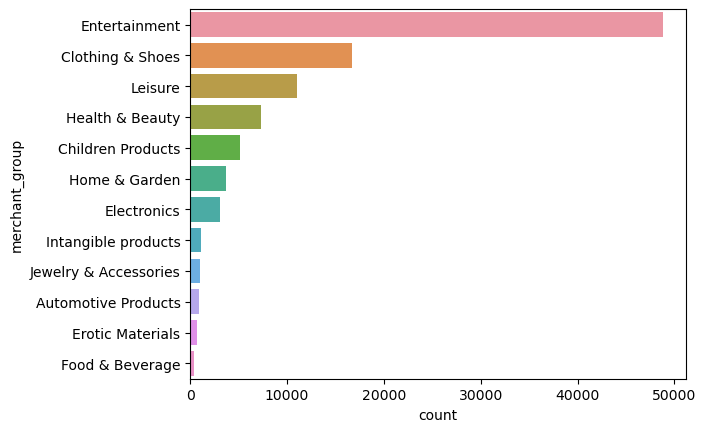

In [47]:
sns.countplot(data=df, y='merchant_group', order=df['merchant_group'].value_counts().sort_values(ascending=False).index)

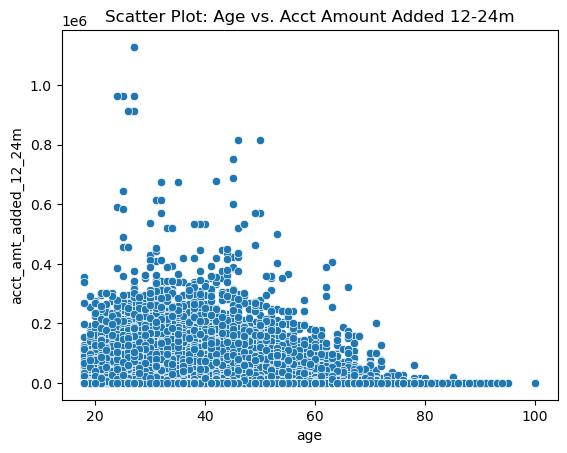

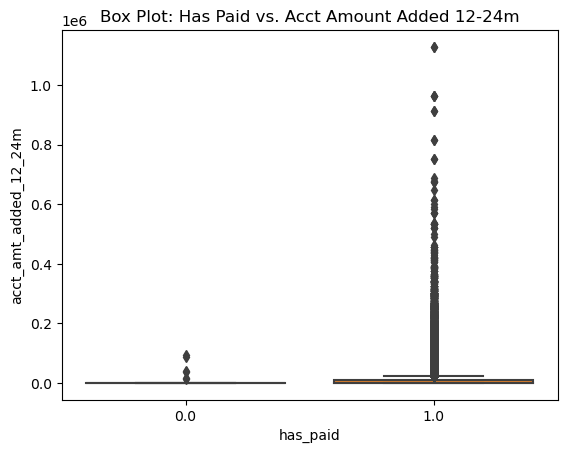

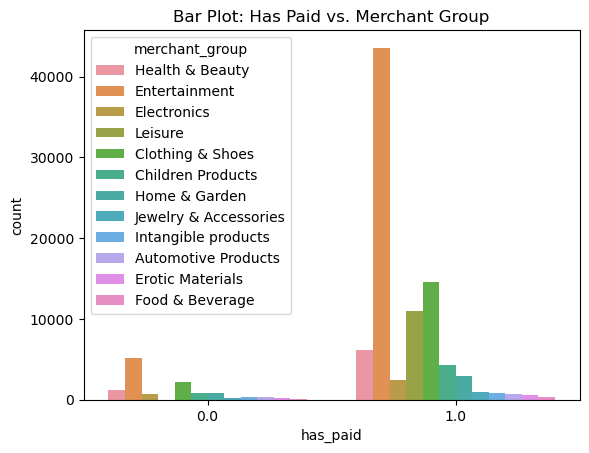

In [48]:
sns.scatterplot(x='age', y='acct_amt_added_12_24m', data=df)
plt.title('Scatter Plot: Age vs. Acct Amount Added 12-24m')
plt.show()


sns.boxplot(x='has_paid', y='acct_amt_added_12_24m', data=df)
plt.title('Box Plot: Has Paid vs. Acct Amount Added 12-24m')
plt.show()

sns.countplot(x='has_paid', hue='merchant_group', data=df)
plt.title('Bar Plot: Has Paid vs. Merchant Group')
plt.show()

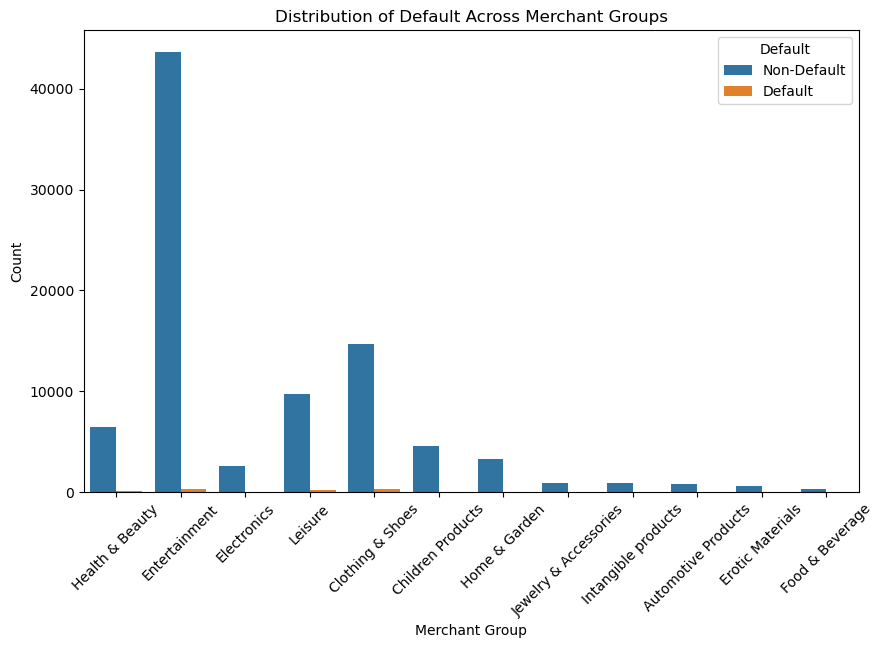

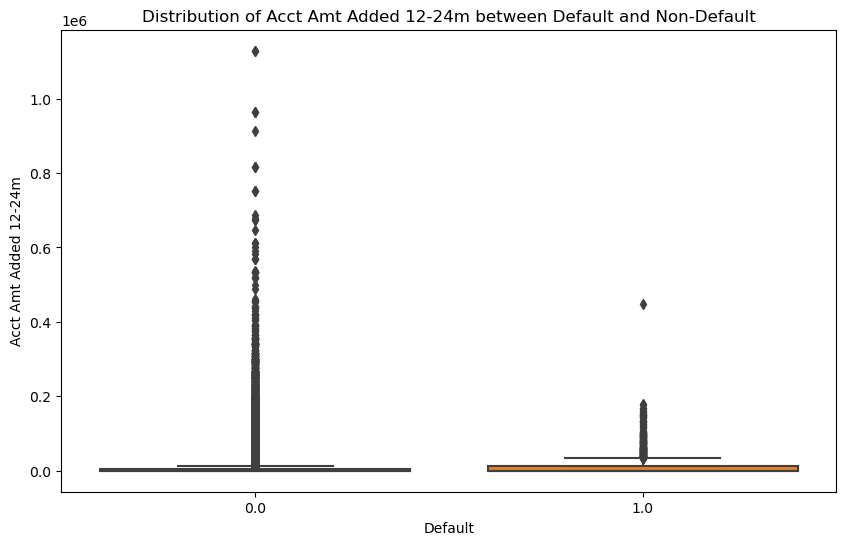

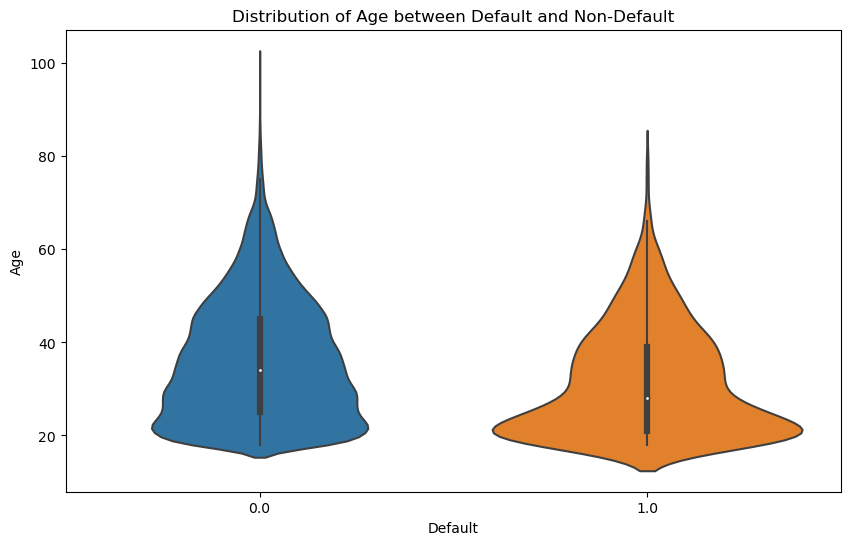

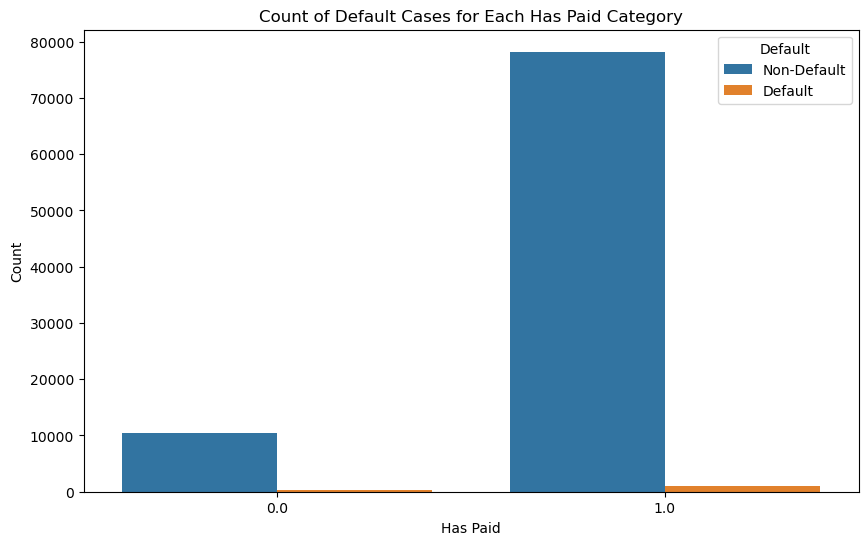

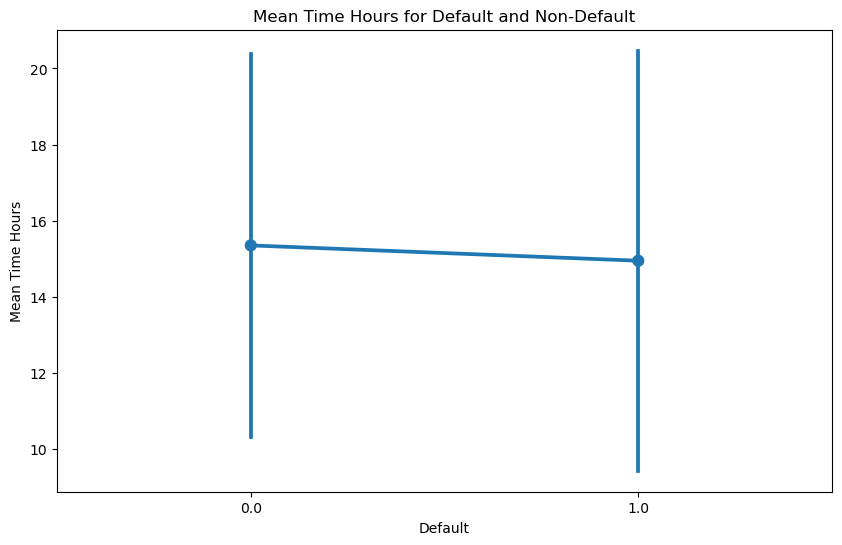

In [49]:
plt.figure(figsize=(10, 6))
sns.countplot(x='merchant_group', hue='default', data=df)
plt.title('Distribution of Default Across Merchant Groups')
plt.xlabel('Merchant Group')
plt.ylabel('Count')
plt.legend(title='Default', labels=['Non-Default', 'Default'])
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x='default', y='acct_amt_added_12_24m', data=df)
plt.title('Distribution of Acct Amt Added 12-24m between Default and Non-Default')
plt.xlabel('Default')
plt.ylabel('Acct Amt Added 12-24m')
plt.show()


plt.figure(figsize=(10, 6))
sns.violinplot(x='default', y='age', data=df)
plt.title('Distribution of Age between Default and Non-Default')
plt.xlabel('Default')
plt.ylabel('Age')
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(x='has_paid', hue='default', data=df)
plt.title('Count of Default Cases for Each Has Paid Category')
plt.xlabel('Has Paid')
plt.ylabel('Count')
plt.legend(title='Default', labels=['Non-Default', 'Default'])
plt.show()


plt.figure(figsize=(10, 6))
sns.pointplot(x='default', y='time_hours', data=df, ci='sd')
plt.title('Mean Time Hours for Default and Non-Default')
plt.xlabel('Default')
plt.ylabel('Mean Time Hours')
plt.show()


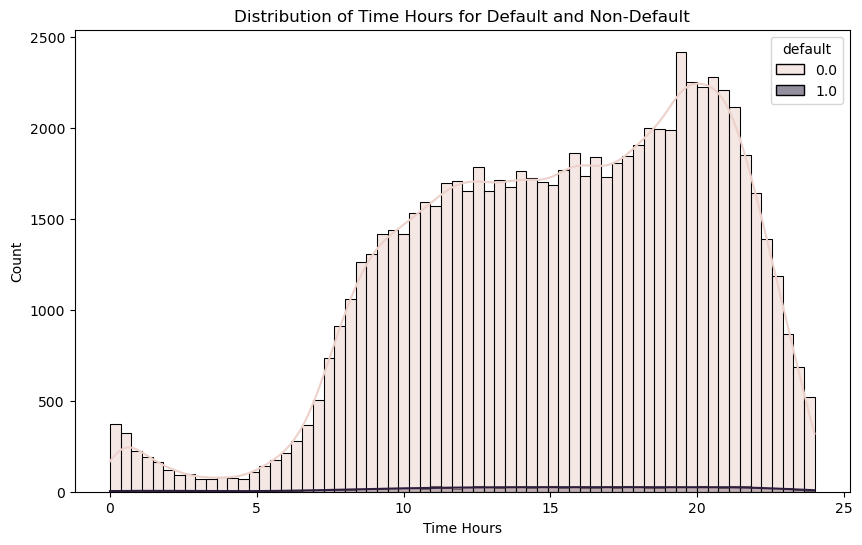

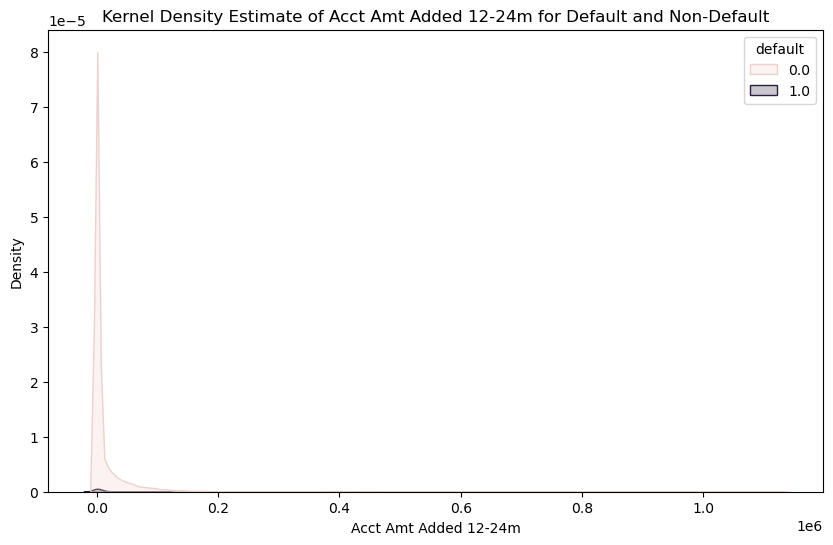

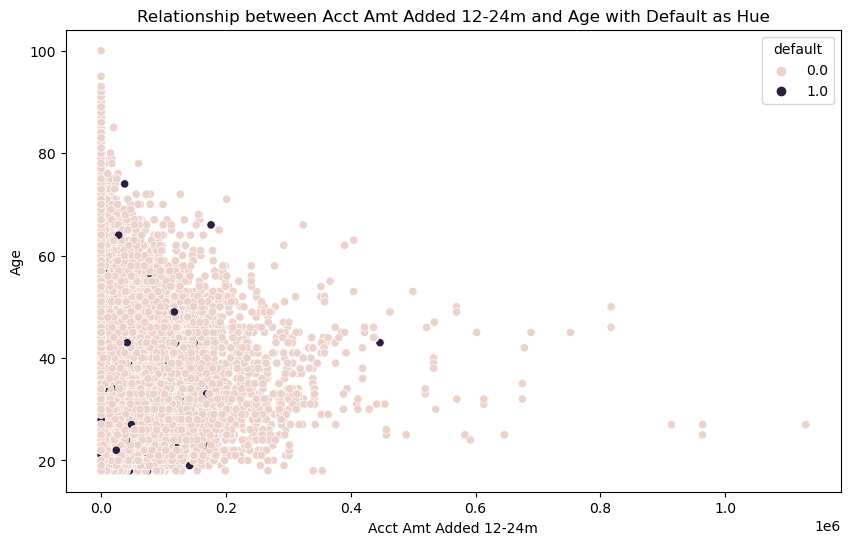

In [50]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='time_hours', hue='default', kde=True)
plt.title('Distribution of Time Hours for Default and Non-Default')
plt.xlabel('Time Hours')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='acct_amt_added_12_24m', hue='default', fill=True)
plt.title('Kernel Density Estimate of Acct Amt Added 12-24m for Default and Non-Default')
plt.xlabel('Acct Amt Added 12-24m')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='acct_amt_added_12_24m', y='age', hue='default')
plt.title('Relationship between Acct Amt Added 12-24m and Age with Default as Hue')
plt.xlabel('Acct Amt Added 12-24m')
plt.ylabel('Age')
plt.show()


In [51]:
df.dtypes

default                            float64
acct_amt_added_12_24m              float64
acct_days_in_dc_12_24m             float64
acct_days_in_rem_12_24m            float64
acct_days_in_term_12_24m           float64
age                                float64
merchant_category                   object
merchant_group                      object
has_paid                           float64
max_paid_inv_0_12m                 float64
max_paid_inv_0_24m                 float64
num_active_inv                     float64
num_arch_dc_0_12m                  float64
num_arch_dc_12_24m                 float64
num_arch_ok_0_12m                  float64
num_arch_ok_12_24m                 float64
num_arch_rem_0_12m                 float64
status_max_archived_0_6_months     float64
status_max_archived_0_12_months    float64
status_max_archived_0_24_months    float64
recovery_debt                      float64
sum_capital_paid_acct_0_12m        float64
sum_capital_paid_acct_12_24m       float64
sum_paid_in

In [52]:
df.shape

(99977, 25)

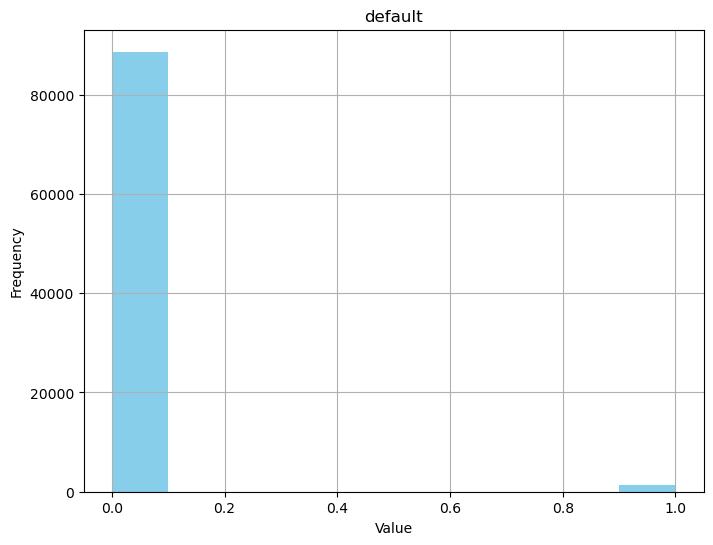

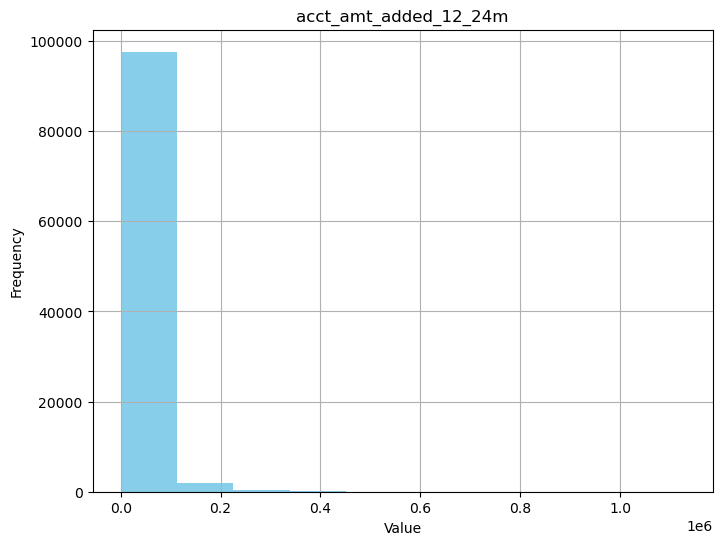

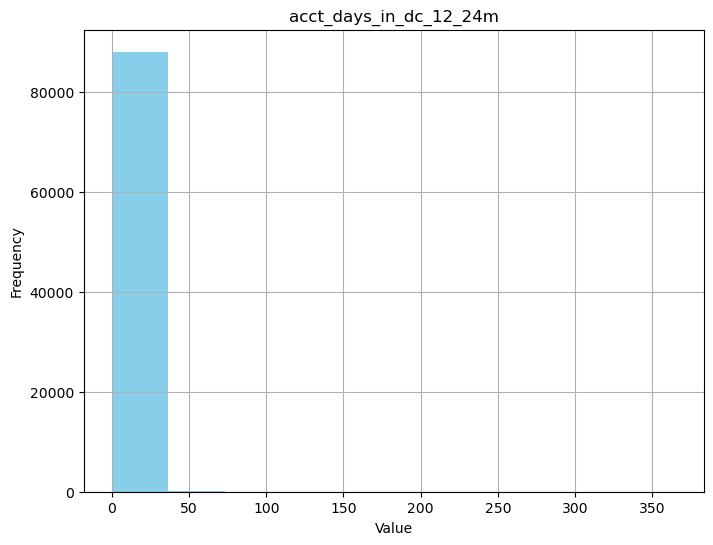

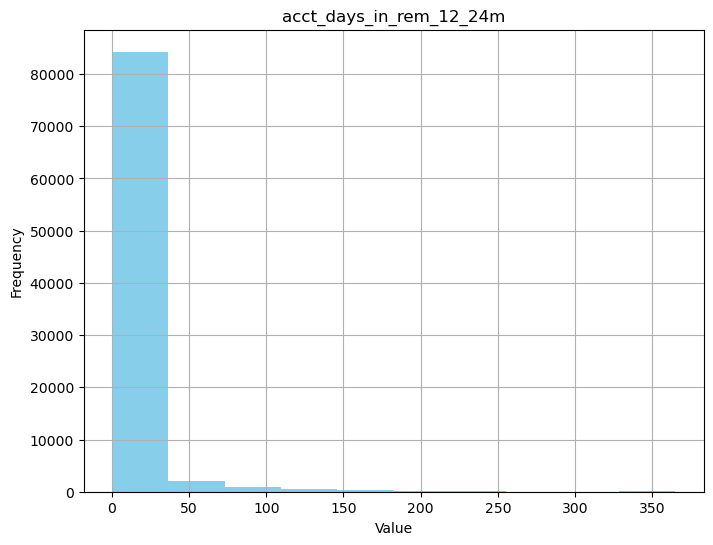

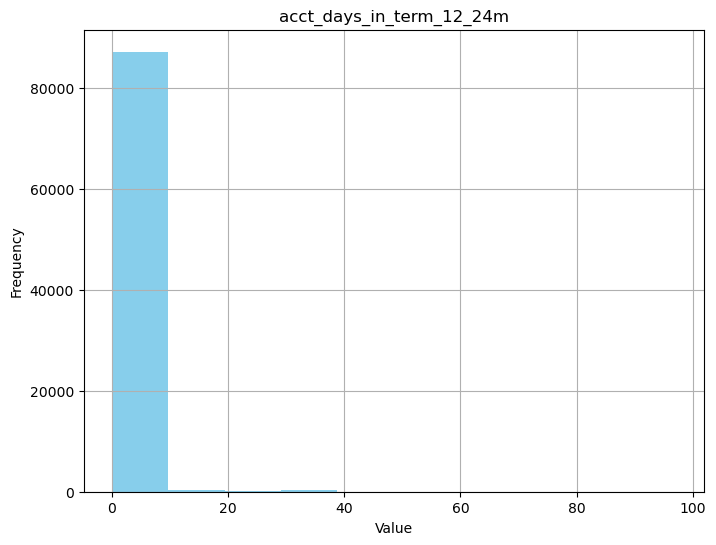

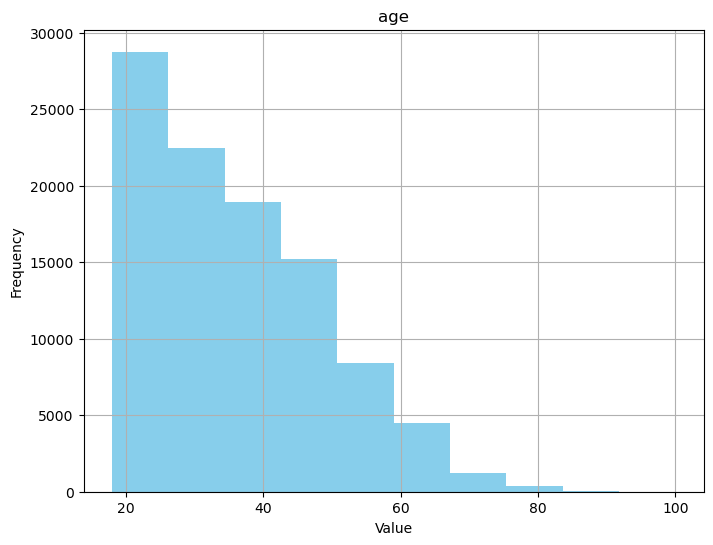

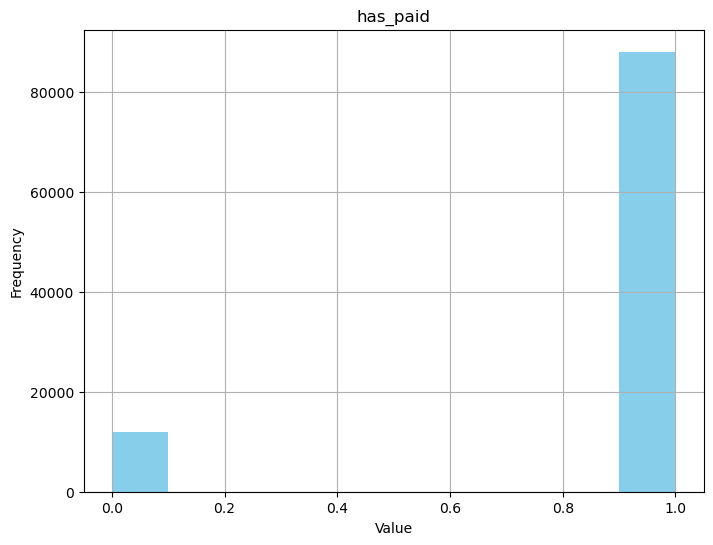

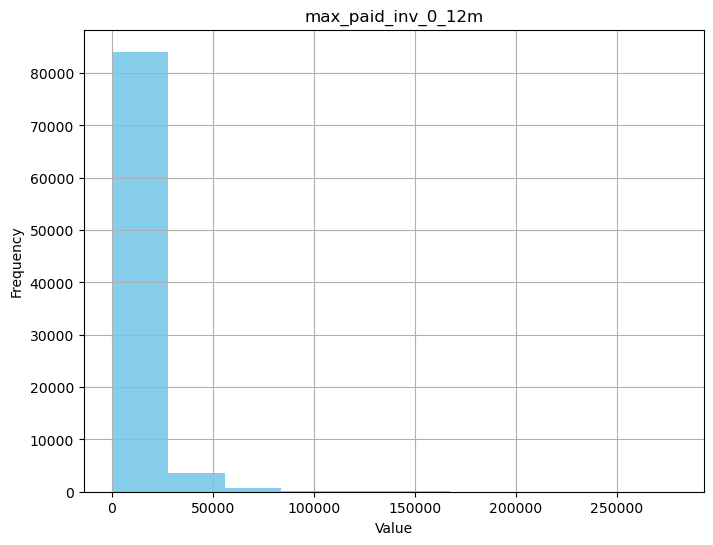

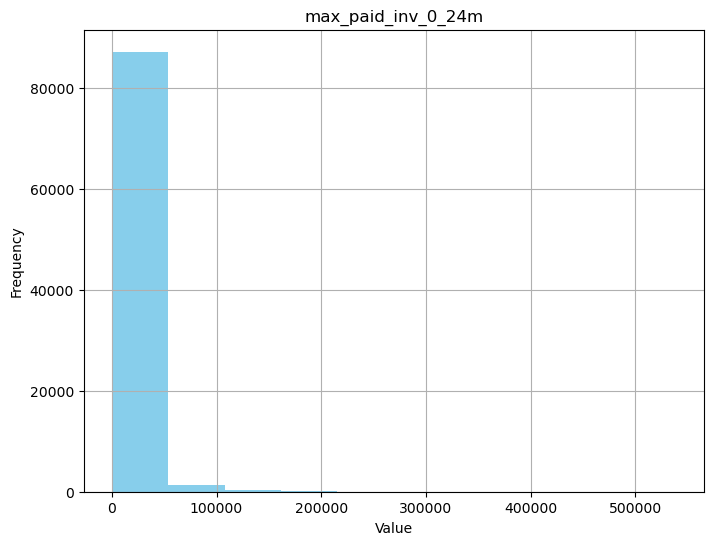

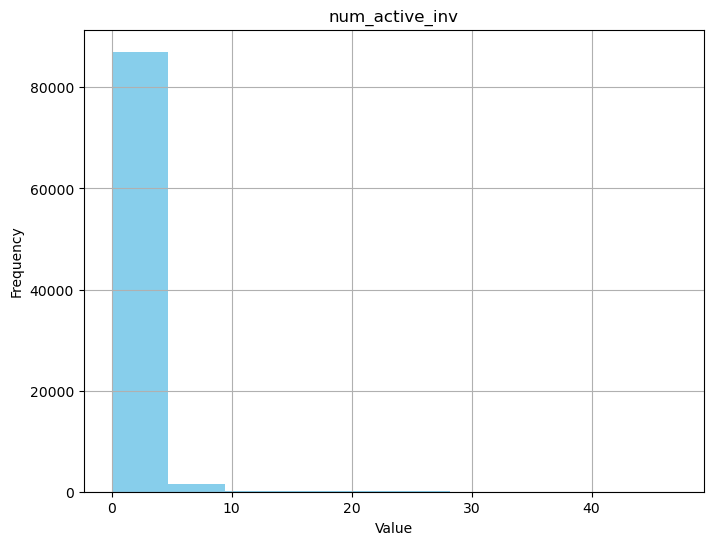

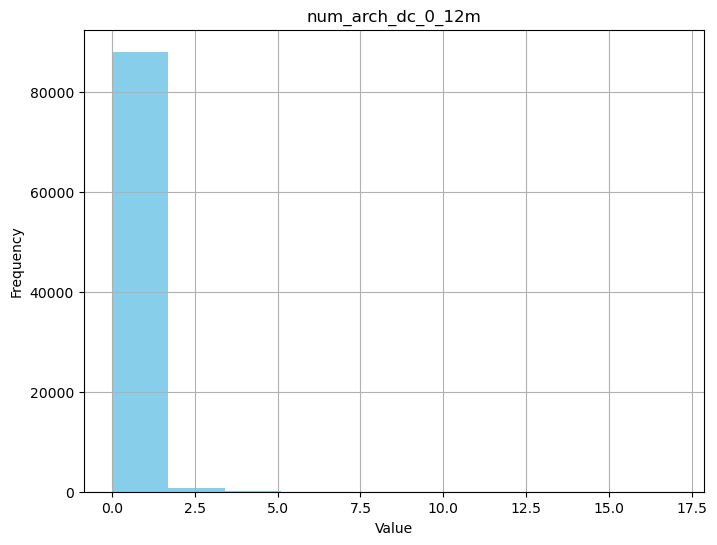

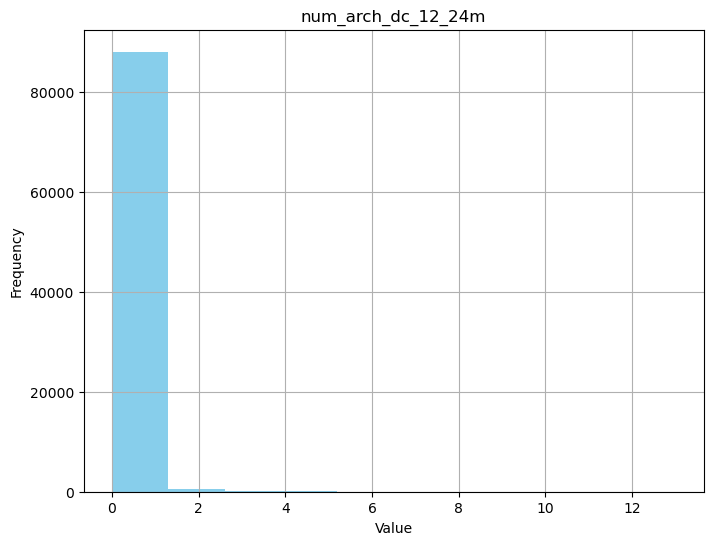

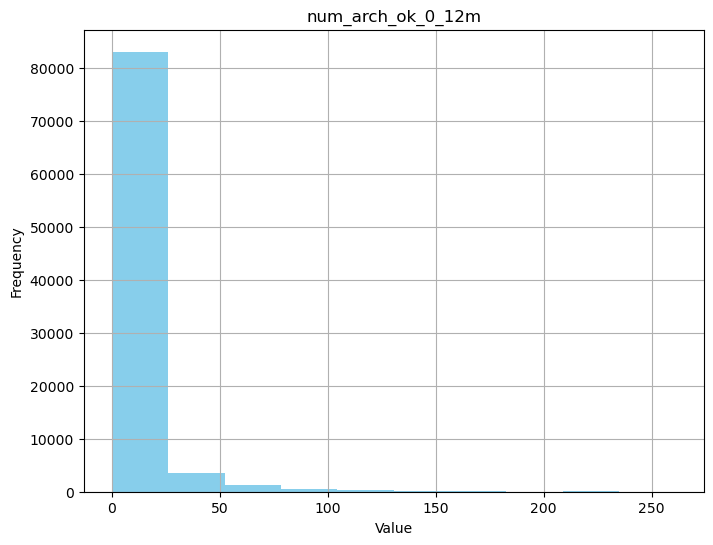

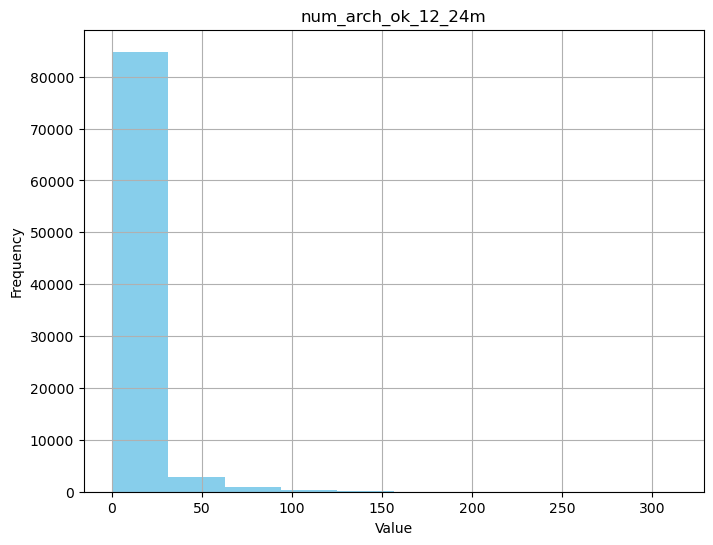

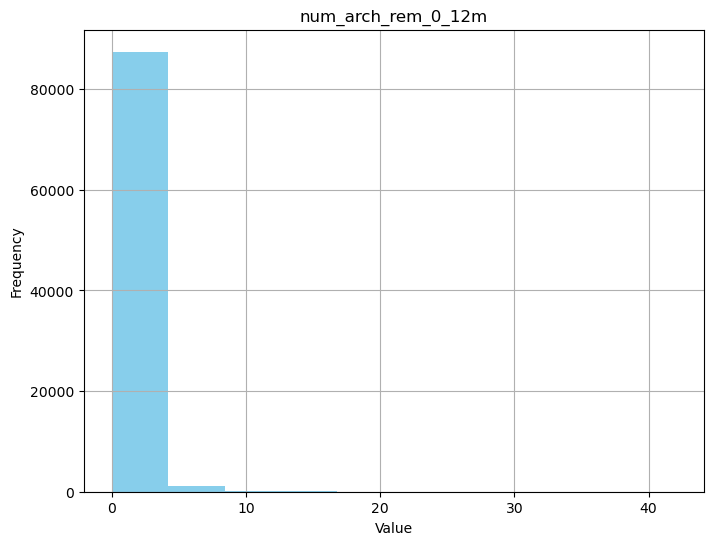

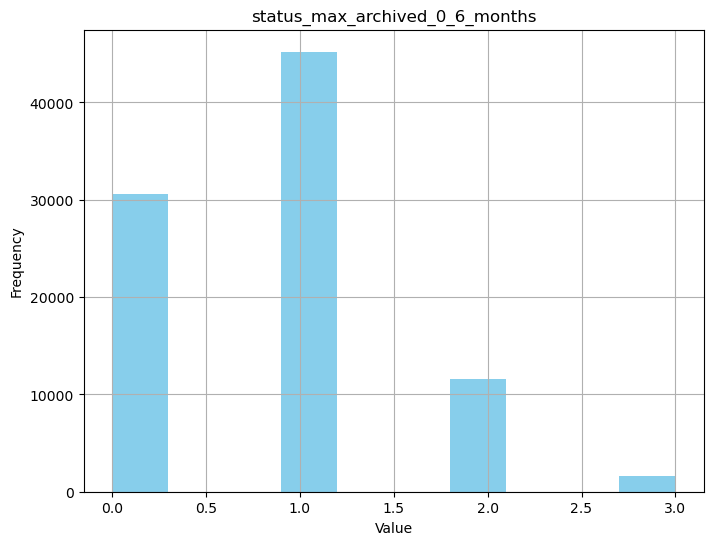

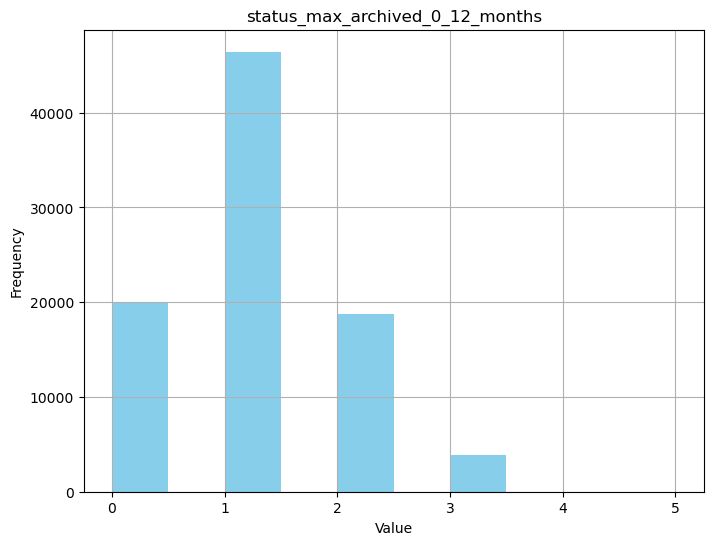

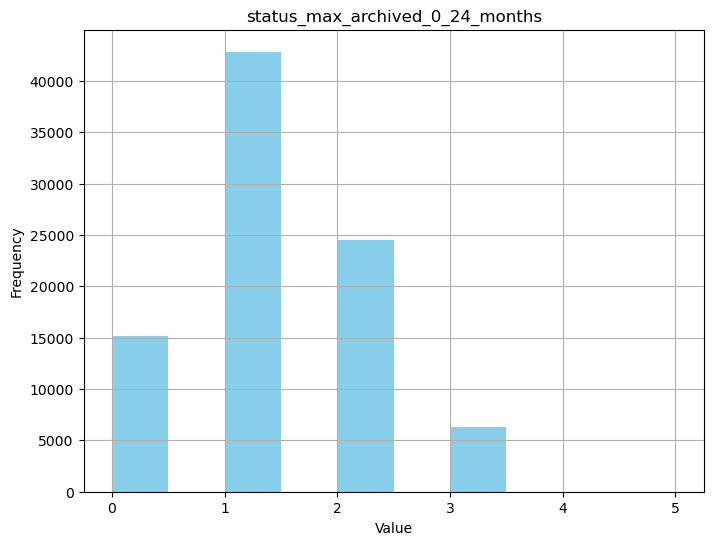

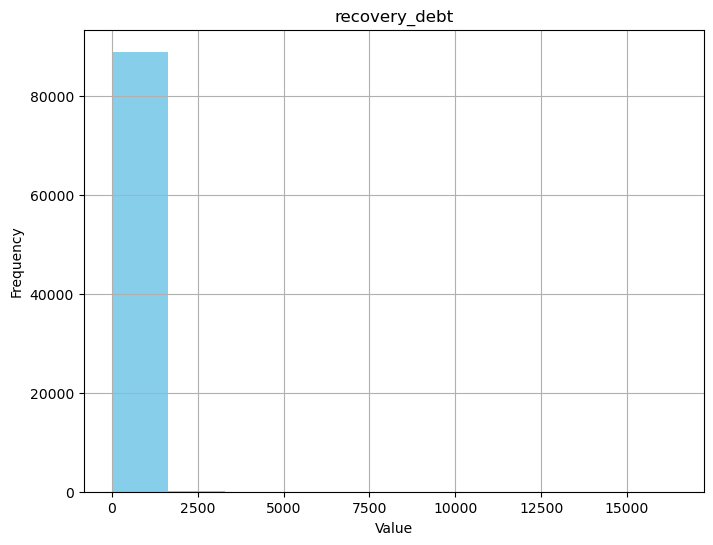

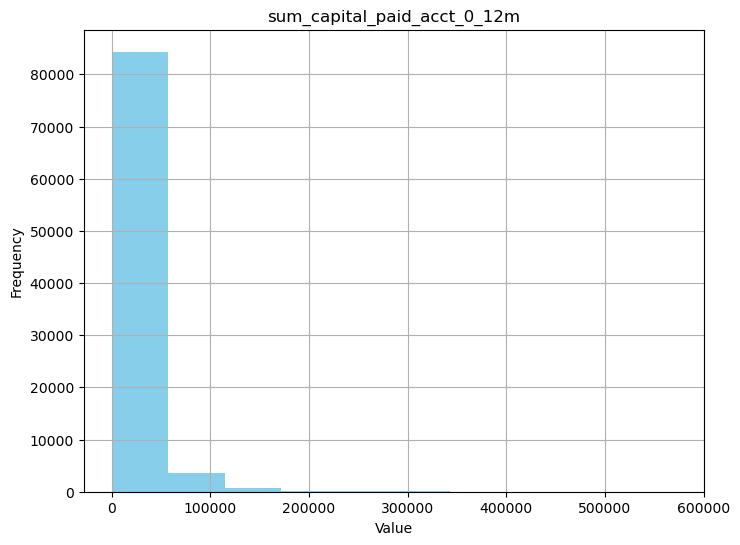

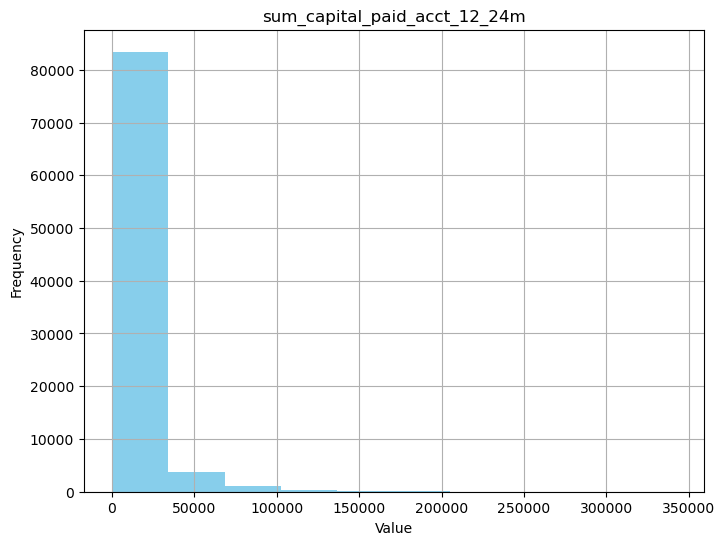

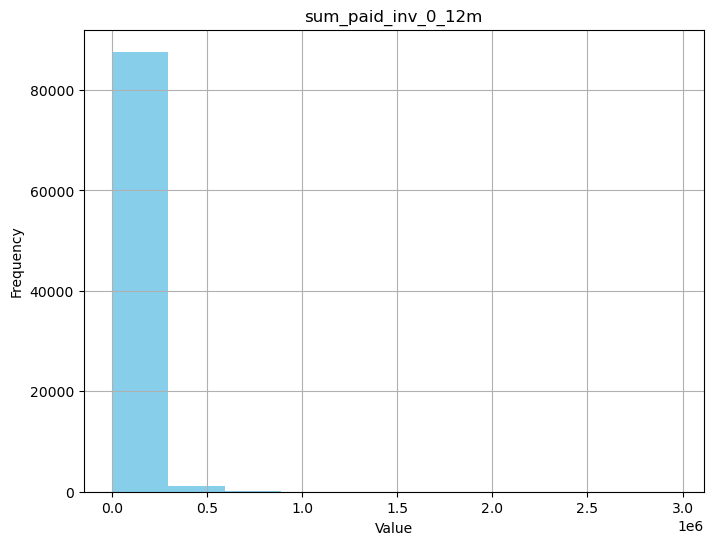

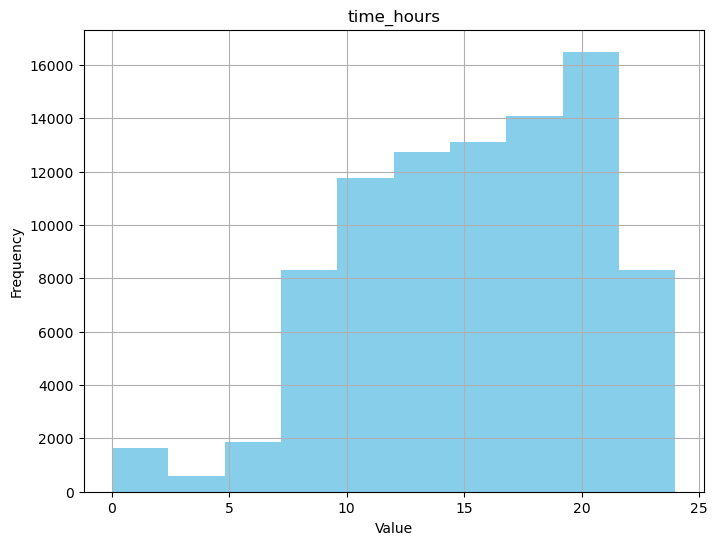

In [53]:
numeric_cols = df.select_dtypes(include=['float64'])

# Plot histograms for each numeric column
for col in numeric_cols.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df[col], color='skyblue')
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


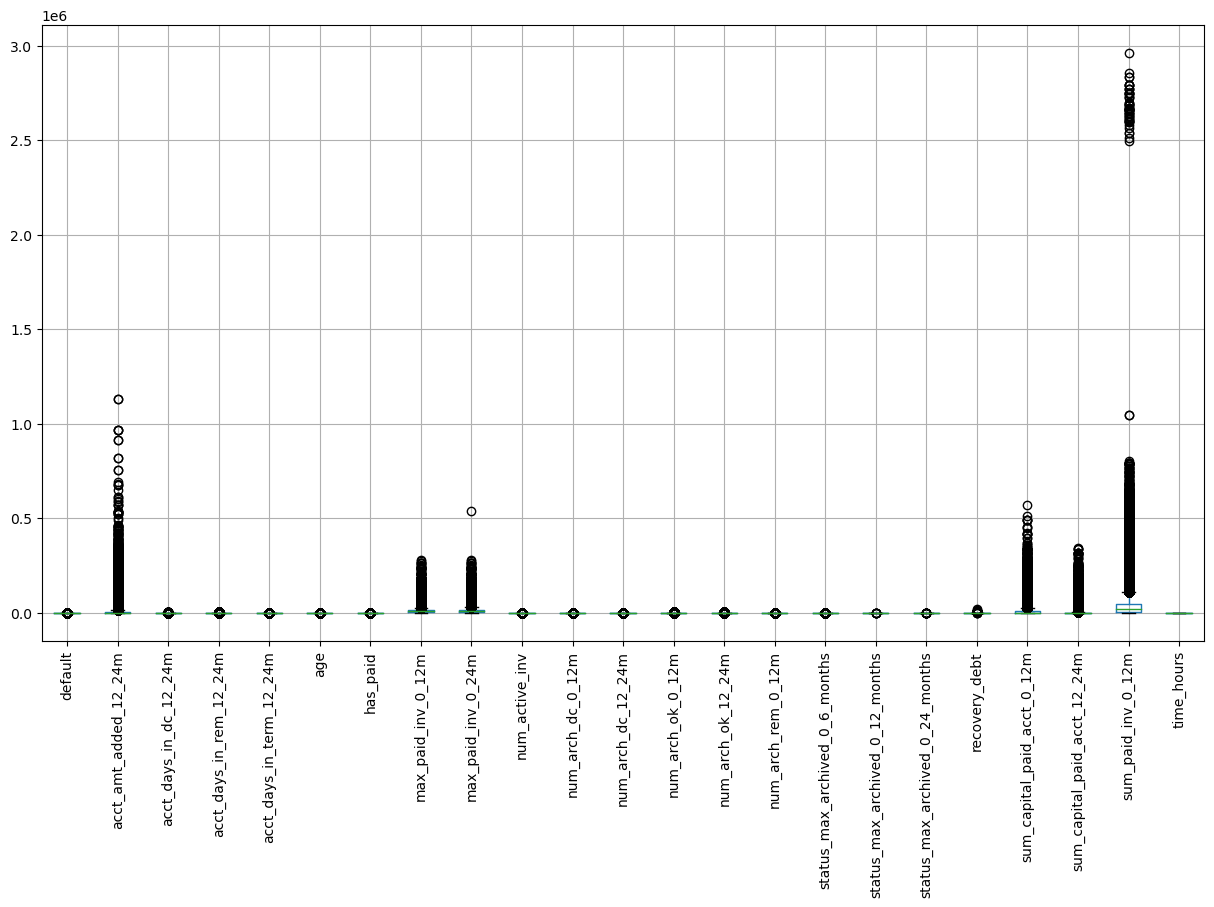

In [54]:
df.boxplot(figsize=(15,8))
plt.xticks(rotation=90)
plt.show();

In [55]:
df

default  acct_amt_added_12_24m  acct_days_in_dc_12_24m  \
0          0.0                    0.0                     0.0   
1          0.0                    0.0                     0.0   
2          0.0                    0.0                     0.0   
3          0.0                    0.0                     NaN   
4          0.0                    0.0                     0.0   
...        ...                    ...                     ...   
99972      NaN                    0.0                     0.0   
99973      NaN                45671.0                     0.0   
99974      NaN                56102.0                     0.0   
99975      NaN                    0.0                     0.0   
99976      NaN                    NaN                     NaN   

       acct_days_in_rem_12_24m  acct_days_in_term_12_24m   age  \
0                          0.0                       0.0  20.0   
1                          0.0                       0.0  50.0   
2                          0.0                       0.0  22.0   
3                          NaN                       NaN  36.0   
4                          0.0                       0.0  25.0   
...                        ...                       ...   ...   
99972                      0.0                       0.0  44.0   
99973                     20.0                       0.0  24.0   
99974                      0.0                       0.0  31.0   
99975                      0.0                       0.0  41.0   
99976                      NaN                       NaN   NaN   

                                merchant_category         merchant_group  \
0                             Dietary supplements        Health & Beauty   
1                               Books & Magazines          Entertainment   
2                       Diversified entertainment          Entertainment   
3                       Diversified entertainment          Entertainment   
4      Electronic equipment & Related accessories            Electronics   
...                                           ...                    ...   
99972                            Body & Hair Care        Health & Beauty   
99973                           Jewelry & Watches  Jewelry & Accessories   
99974                            Decoration & Art          Home & Garden   
99975                         Dietary supplements        Health & Beauty   
99976                                         NaN                    NaN   

       has_paid  max_paid_inv_0_12m  ...  num_arch_ok_12_24m  \
0           1.0             31638.0  ...                14.0   
1           1.0             13749.0  ...                19.0   
2           1.0             29890.0  ...                 0.0   
3           1.0             40040.0  ...                21.0   
4           1.0              7100.0  ...                 0.0   
...         ...                 ...  ...                 ...   
99972       1.0              4740.0  ...                 3.0   
99973       1.0              1200.0  ...                 0.0   
99974       1.0             15000.0  ...                 1.0   
99975       1.0             13246.0  ...                 2.0   
99976       1.0                 NaN  ...                 NaN   

       num_arch_rem_0_12m  status_max_archived_0_6_months  \
0                     0.0                             1.0   
1                     3.0                             1.0   
2                     3.0                             1.0   
3                     0.0                             1.0   
4                     0.0                             1.0   
...                   ...                             ...   
99972                 0.0                             0.0   
99973                 0.0                             0.0   
99974                 0.0                             1.0   
99975                 1.0                             2.0   
99976                 NaN                             NaN   

       status_max_

In [56]:
df.shape

(99977, 25)

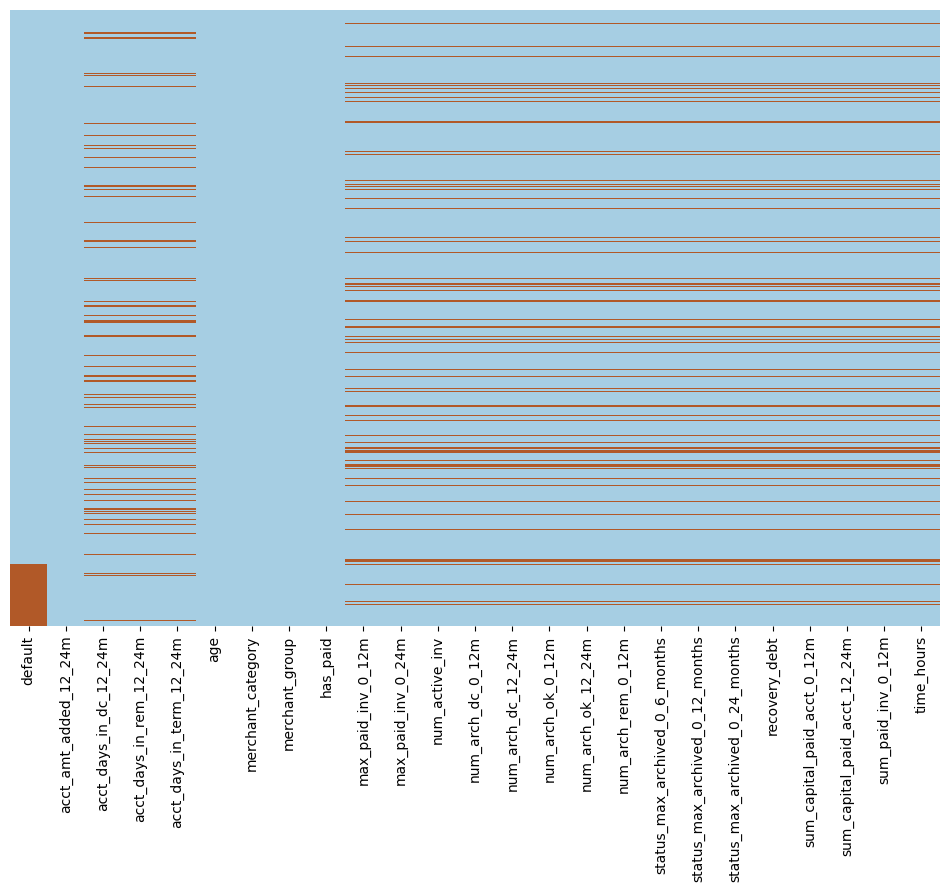

In [57]:
plt.figure(figsize = (12,8))
sns.heatmap(df.isnull(), cbar = False, cmap = 'Paired', yticklabels = False)
plt.savefig('missing_vis.jpg', bbox_inches='tight');
plt.show();

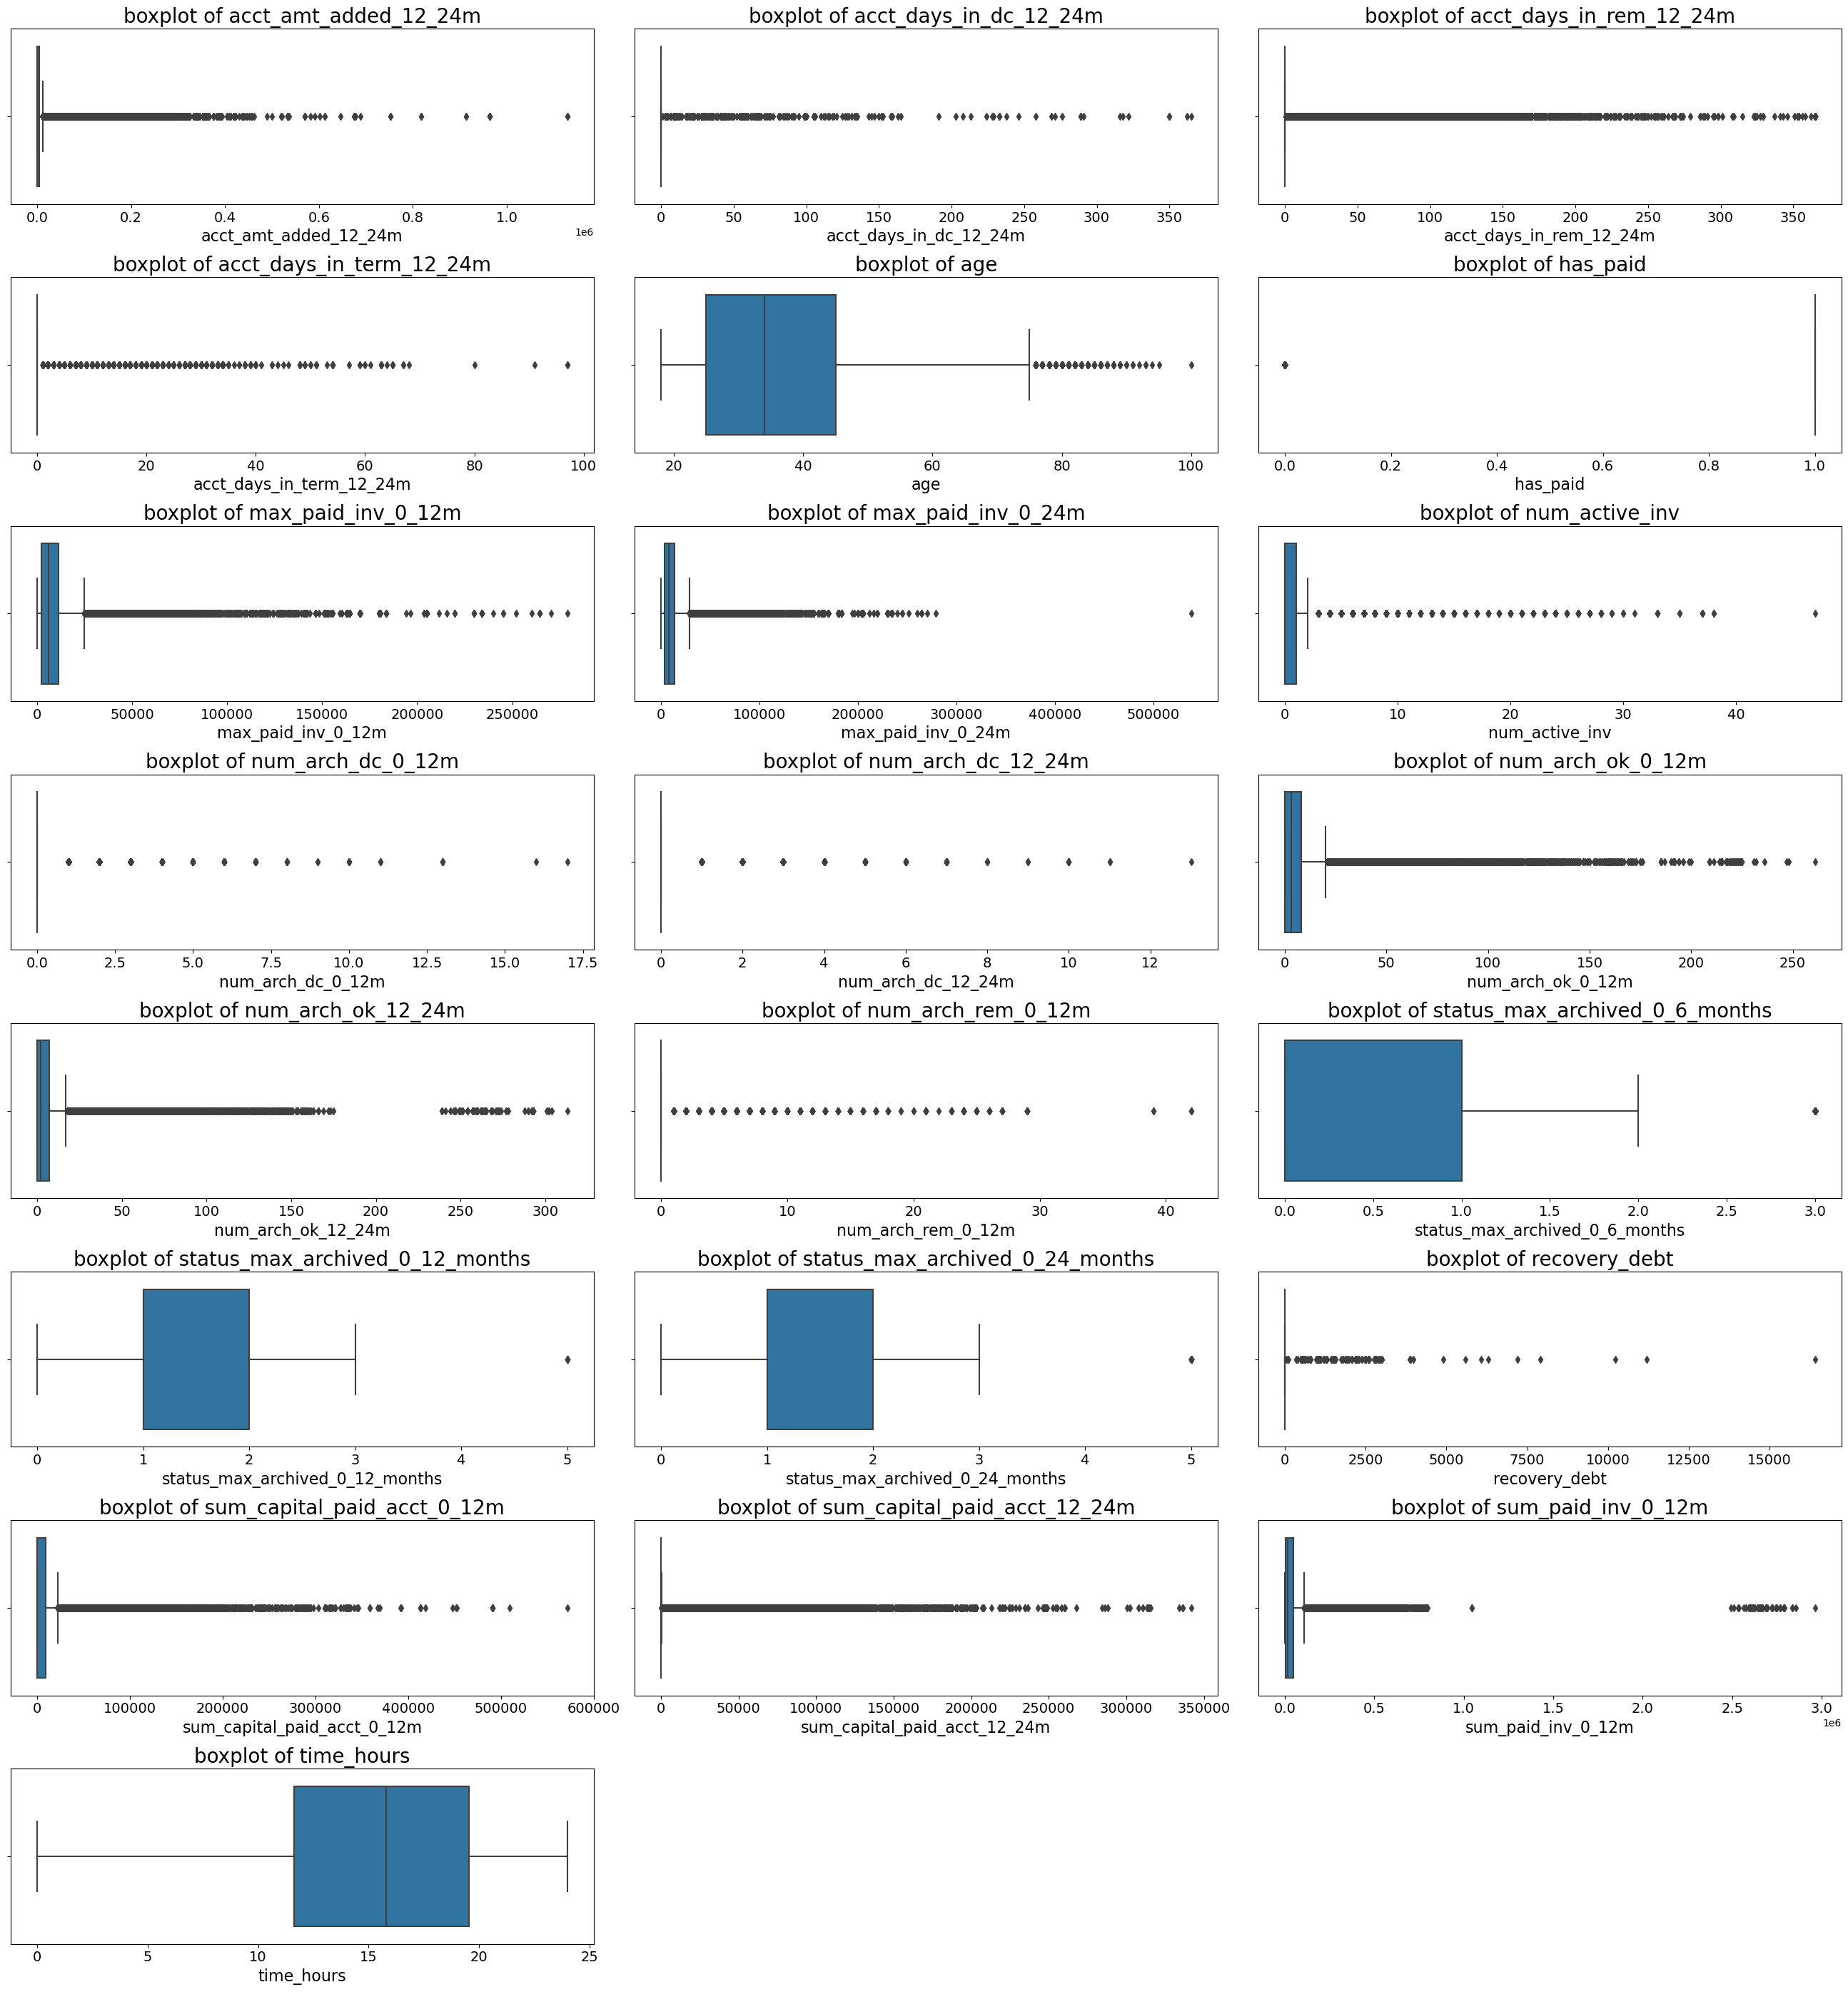

In [58]:
plt.figure(figsize=(26,28))
p=1
for i in df.drop(['default','merchant_category','merchant_group'],axis=1):
    plt.subplot(8,3,p)
    p=p+1
    sns.boxplot(data=df, x=df[i])
    plt.title('boxplot of {}'.format(i), fontsize=20)
    plt.xticks(fontsize=14)
    plt.xlabel(i, fontsize=16)
    plt.tight_layout()

In [59]:
df.columns

Index(['default', 'acct_amt_added_12_24m', 'acct_days_in_dc_12_24m',
       'acct_days_in_rem_12_24m', 'acct_days_in_term_12_24m', 'age',
       'merchant_category', 'merchant_group', 'has_paid', 'max_paid_inv_0_12m',
       'max_paid_inv_0_24m', 'num_active_inv', 'num_arch_dc_0_12m',
       'num_arch_dc_12_24m', 'num_arch_ok_0_12m', 'num_arch_ok_12_24m',
       'num_arch_rem_0_12m', 'status_max_archived_0_6_months',
       'status_max_archived_0_12_months', 'status_max_archived_0_24_months',
       'recovery_debt', 'sum_capital_paid_acct_0_12m',
       'sum_capital_paid_acct_12_24m', 'sum_paid_inv_0_12m', 'time_hours'],
      dtype='object')

In [60]:
df_X=df.drop(['default','merchant_category', 'merchant_group',], axis=1)
df_y=df.default

In [61]:

# Extracting columns to impute (excluding has_paid and acct_status)
columns_to_impute = df_X.columns.difference(['has_paid'])

# Initialize SimpleImputer with 'mean', 'median', or 'most_frequent' strategy as per your requirement
imputer = SimpleImputer(strategy='median')

# Impute missing values for selected columns
imputed_data = imputer.fit_transform(df_X[columns_to_impute])

# Create a DataFrame from the imputed data
df_imputed = pd.DataFrame(imputed_data, columns=columns_to_impute)

# Concatenate the imputed DataFrame with the original DataFrame, including 'has_paid' and 'acct_status'
df_X = pd.concat([df_X[['has_paid']], df_imputed], axis=1)


In [62]:
df_X

has_paid  acct_amt_added_12_24m  acct_days_in_dc_12_24m  \
0           1.0                    0.0                     0.0   
1           1.0                    0.0                     0.0   
2           1.0                    0.0                     0.0   
3           1.0                    0.0                     0.0   
4           1.0                    0.0                     0.0   
...         ...                    ...                     ...   
99972       1.0                    0.0                     0.0   
99973       1.0                45671.0                     0.0   
99974       1.0                56102.0                     0.0   
99975       1.0                    0.0                     0.0   
99976       1.0                    0.0                     0.0   

       acct_days_in_rem_12_24m  acct_days_in_term_12_24m   age  \
0                          0.0                       0.0  20.0   
1                          0.0                       0.0  50.0   
2                          0.0                       0.0  22.0   
3                          0.0                       0.0  36.0   
4                          0.0                       0.0  25.0   
...                        ...                       ...   ...   
99972                      0.0                       0.0  44.0   
99973                     20.0                       0.0  24.0   
99974                      0.0                       0.0  31.0   
99975                      0.0                       0.0  41.0   
99976                      0.0                       0.0  34.0   

       max_paid_inv_0_12m  max_paid_inv_0_24m  num_active_inv  \
0                 31638.0             31638.0             2.0   
1                 13749.0             13749.0             0.0   
2                 29890.0             29890.0             1.0   
3                 40040.0             40040.0             1.0   
4                  7100.0              7100.0             0.0   
...                   ...                 ...             ...   
99972              4740.0              4740.0             0.0   
99973              1200.0              1200.0             0.0   
99974             15000.0             15000.0             0.0   
99975             13246.0             14817.0             0.0   
99976              6170.0              7720.0             0.0   

       num_arch_dc_0_12m  ...  num_arch_ok_12_24m  num_arch_rem_0_12m  \
0                    0.0  ...                14.0                 0.0   
1                    0.0  ...                19.0                 3.0   
2                    0.0  ...                 0.0                 3.0   
3                    0.0  ...                21.0                 0.0   
4                    0.0  ...                 0.0                 0.0   
...                  ...  ...                 ...                 ...   
99972                0.0  ...                 3.0                 0.0   
99973                0.0  ...                 0.0                 0.0   
99974                0.0  ...                 1.0                 0.0   
99975                0.0  ...                 2.0                 1.0   
99976                0.0  ...                 2.0                 0.0   

       recovery_debt  status_max_archived_0_12_months  \
0                0.0                              1.0   
1                0.0                              2.0   
2                0.0                              2.0   
3                0.0                              1.0   
4                0.0                              1.0   
...              ...                              ...   
99972            0.0                              1.0   
99973            0.0                              0.0   
99974            0.0                              1.0   
99975            0.0                              2.0   
99976            0.0                              1.0   

       status_max_archived_0_24_months  status_max_archived_0_6_months  \
0   

In [63]:
df_X.describe()

has_paid  acct_amt_added_12_24m  acct_days_in_dc_12_24m  \
count  99977.000000           9.997700e+04            99977.000000   
mean       0.880573           1.225503e+04                0.196635   
std        0.324292           3.548133e+04                5.453928   
min        0.000000           0.000000e+00                0.000000   
25%        1.000000           0.000000e+00                0.000000   
50%        1.000000           0.000000e+00                0.000000   
75%        1.000000           4.937000e+03                0.000000   
max        1.000000           1.128775e+06              365.000000   

       acct_days_in_rem_12_24m  acct_days_in_term_12_24m           age  \
count             99977.000000              99977.000000  99977.000000   
mean                  4.447353                  0.252928     36.016264   
std                  21.529593                  2.752561     13.001242   
min                   0.000000                  0.000000     18.000000   
25%                   0.000000                  0.000000     25.000000   
50%                   0.000000                  0.000000     34.000000   
75%                   0.000000                  0.000000     45.000000   
max                 365.000000                 97.000000    100.000000   

       max_paid_inv_0_12m  max_paid_inv_0_24m  num_active_inv  \
count        99977.000000        99977.000000    99977.000000   
mean          9010.408594        11011.374336        0.556898   
std          12934.597693        14601.300041        1.531669   
min              0.000000            0.000000        0.000000   
25%           2990.000000         4250.000000        0.000000   
50%           6170.000000         7720.000000        0.000000   
75%          10570.000000        12785.000000        1.000000   
max         279000.000000       538500.000000       47.000000   

       num_arch_dc_0_12m  ...  num_arch_ok_12_24m  num_arch_rem_0_12m  \
count       99977.000000  ...        99977.000000        99977.000000   
mean            0.055703  ...            6.311702            0.430579   
std             0.360942  ...           15.231239            1.325053   
min             0.000000  ...            0.000000            0.000000   
25%             0.000000  ...            0.000000            0.000000   
50%             0.000000  ...            2.000000            0.000000   
75%             0.000000  ...            6.000000            0.000000   
max            17.000000  ...          313.000000           42.000000   

       recovery_debt  status_max_archived_0_12_months  \
count   99977.000000                     99977.000000   
mean        3.204397                         1.066005   
std       109.616331                         0.732655   
min         0.000000                         0.000000   
25%         0.000000                         1.000000   
50%         0.000000                         1.000000   
75%         0.000000                         1.000000   
max     16411.000000                         5.000000   

       status_max_archived_0_24_months  status_max_archived_0_6_months  \
count                     99977.000000                    99977.000000   
mean                          1.220811                        0.841424   
std                           0.777804                        0.678240   
min                           0.000000                        0.000000   
25%                           1.000000                        0.000000   
50%                           1.000000                        1.000000   
75%                           2.000000                        1.000000   
max                           5.000000                        3.000000   

       sum_capital_paid_acct_0_12m  sum_capital_paid_acct_12_24m  \
count                 99977.000000                  99977.000000   
mean                   9661.663133                   5884.884733   
std                   25347.575916                  18268.800061   
min             

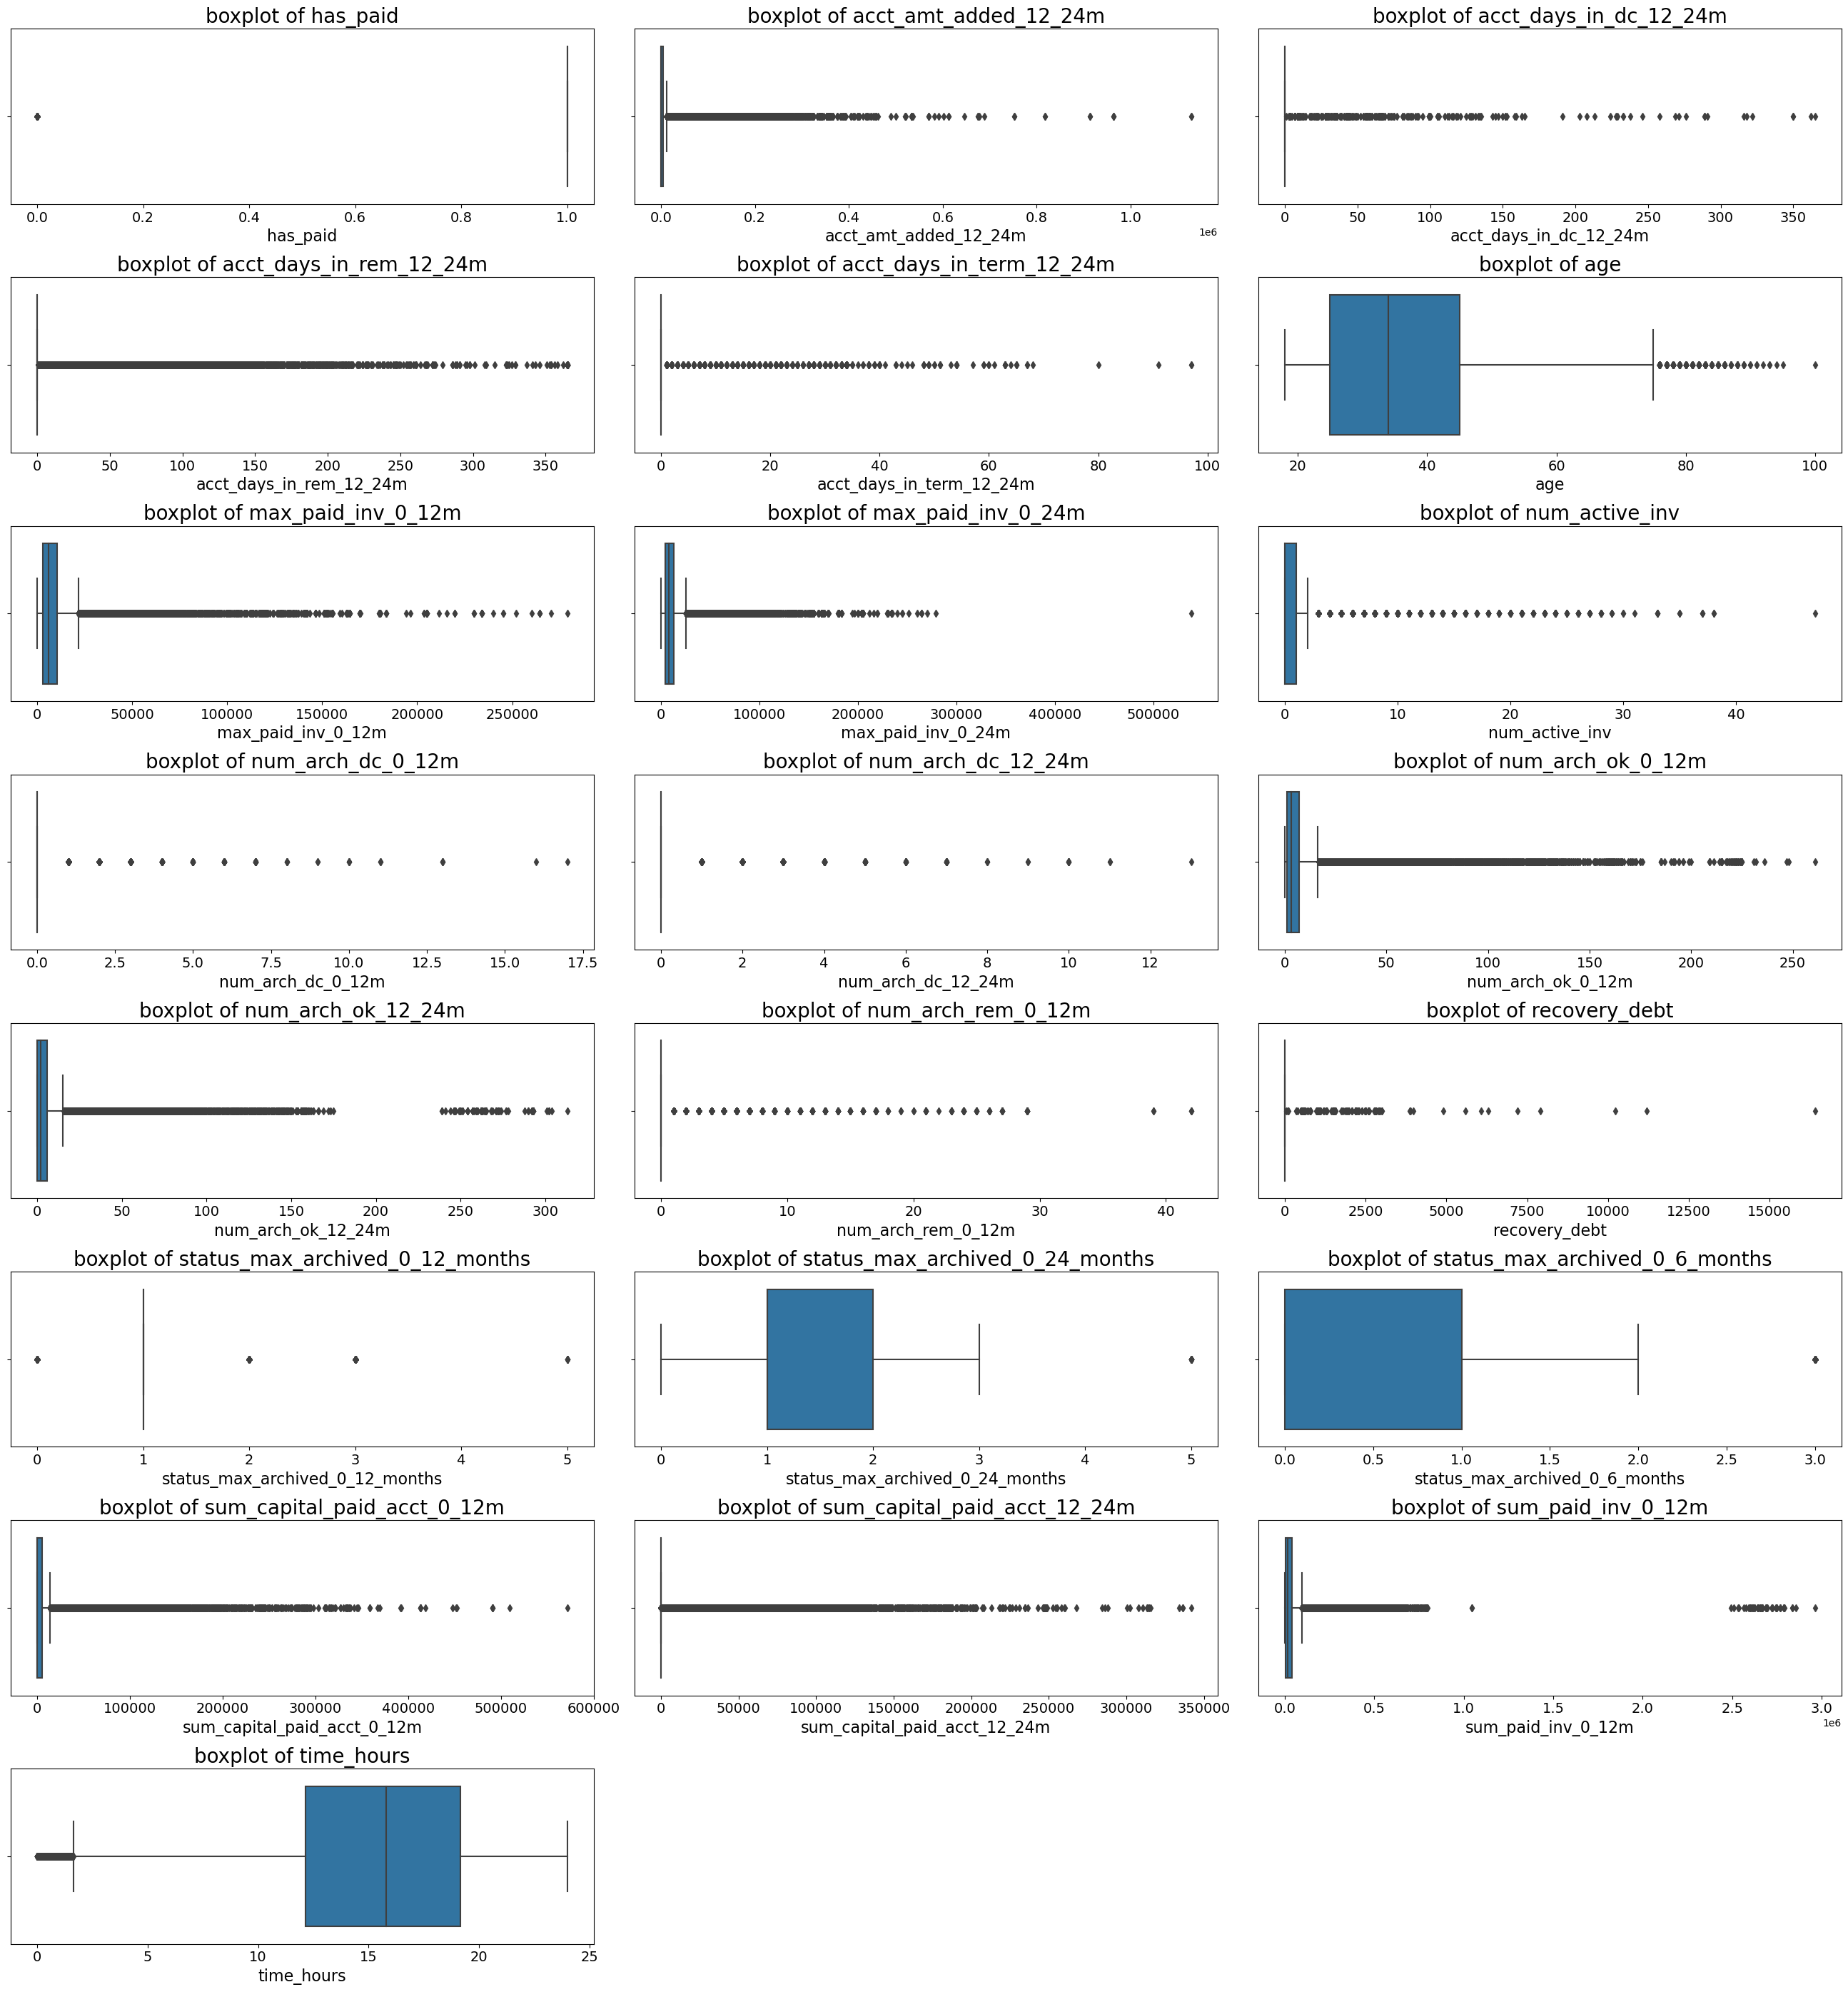

In [64]:
plt.figure(figsize=(26,28))
p=1
for i in df_X:
    plt.subplot(8,3,p)
    p=p+1
    sns.boxplot(data=df_X, x=df_X[i])
    plt.title('boxplot of {}'.format(i), fontsize=20)
    plt.xticks(fontsize=14)
    plt.xlabel(i, fontsize=16)
    plt.tight_layout()

In [65]:
df_X.isnull().sum()

has_paid                           0
acct_amt_added_12_24m              0
acct_days_in_dc_12_24m             0
acct_days_in_rem_12_24m            0
acct_days_in_term_12_24m           0
age                                0
max_paid_inv_0_12m                 0
max_paid_inv_0_24m                 0
num_active_inv                     0
num_arch_dc_0_12m                  0
num_arch_dc_12_24m                 0
num_arch_ok_0_12m                  0
num_arch_ok_12_24m                 0
num_arch_rem_0_12m                 0
recovery_debt                      0
status_max_archived_0_12_months    0
status_max_archived_0_24_months    0
status_max_archived_0_6_months     0
sum_capital_paid_acct_0_12m        0
sum_capital_paid_acct_12_24m       0
sum_paid_inv_0_12m                 0
time_hours                         0
dtype: int64

In [66]:
df_X.shape

(99977, 22)

In [67]:
df_X.describe().T

count          mean           std  \
has_paid                         99977.0      0.880573      0.324292   
acct_amt_added_12_24m            99977.0  12255.026936  35481.327456   
acct_days_in_dc_12_24m           99977.0      0.196635      5.453928   
acct_days_in_rem_12_24m          99977.0      4.447353     21.529593   
acct_days_in_term_12_24m         99977.0      0.252928      2.752561   
age                              99977.0     36.016264     13.001242   
max_paid_inv_0_12m               99977.0   9010.408594  12934.597693   
max_paid_inv_0_24m               99977.0  11011.374336  14601.300041   
num_active_inv                   99977.0      0.556898      1.531669   
num_arch_dc_0_12m                99977.0      0.055703      0.360942   
num_arch_dc_12_24m               99977.0      0.052692      0.342246   
num_arch_ok_0_12m                99977.0      7.258219     15.862925   
num_arch_ok_12_24m               99977.0      6.311702     15.231239   
num_arch_rem_0_12m               99977.0      0.430579      1.325053   
recovery_debt                    99977.0      3.204397    109.616331   
status_max_archived_0_12_months  99977.0      1.066005      0.732655   
status_max_archived_0_24_months  99977.0      1.220811      0.777804   
status_max_archived_0_6_months   99977.0      0.841424      0.678240   
sum_capital_paid_acct_0_12m      99977.0   9661.663133  25347.575916   
sum_capital_paid_acct_12_24m     99977.0   5884.884733  18268.800061   
sum_paid_inv_0_12m               99977.0  38389.690714  89539.449405   
time_hours                       99977.0     15.393313      4.747146   

                                       min          25%           50%  \
has_paid                          0.000000     1.000000      1.000000   
acct_amt_added_12_24m             0.000000     0.000000      0.000000   
acct_days_in_dc_12_24m            0.000000     0.000000      0.000000   
acct_days_in_rem_12_24m           0.000000     0.000000      0.000000   
acct_days_in_term_12_24m          0.000000     0.000000      0.000000   
age                              18.000000    25.000000     34.000000   
max_paid_inv_0_12m                0.000000  2990.000000   6170.000000   
max_paid_inv_0_24m                0.000000  4250.000000   7720.000000   
num_active_inv                    0.000000     0.000000      0.000000   
num_arch_dc_0_12m                 0.000000     0.000000      0.000000   
num_arch_dc_12_24m                0.000000     0.000000      0.000000   
num_arch_ok_0_12m                 0.000000     1.000000      3.000000   
num_arch_ok_12_24m                0.000000     0.000000      2.000000   
num_arch_rem_0_12m                0.000000     0.000000      0.000000   
recovery_debt                     0.000000     0.000000      0.000000   
status_max_archived_0_12_months   0.000000     1.000000      1.000000   
status_max_archived_0_24_months   0.000000     1.000000      1.000000   
status_max_archived_0_6_months    0.000000     0.000000      1.000000   
sum_capital_paid_acct_0_12m       0.000000     0.000000      0.000000   
sum_capital_paid_acct_12_24m      0.000000     0.000000      0.000000   
sum_paid_inv_0_12m                0.000000  4870.000000  17057.500000   
time_hours                        0.000278    12.158056     15.808333   

                                        75%           max  
has_paid                             1.0000  1.000000e+00  
acct_amt_added_12_24m             4937.0000  1.128775e+06  
acct_days_in_dc_12_24m               0.0000  3.650000e+02  
acct_days_in_rem_12_24m              0.0000  3.650000e+02  
acct_days_in_term_12_24m             0.0000  9.700000e+01  
age                                 45.0000  1.000000e+02  
max_paid_inv_0_12m               10570.0000  2.790000e+05  
max_paid_inv_0_24m               12785.0000  5.385000e+05  
num_active_inv                       1.0000  4.700000e+01  
num_arch_dc_0_12m                    0.0000  1.700000e+01  
num_arch_dc_12_24m                   0

In [68]:
df_X.shape

(99977, 22)

In [69]:
df_X.columns

Index(['has_paid', 'acct_amt_added_12_24m', 'acct_days_in_dc_12_24m',
       'acct_days_in_rem_12_24m', 'acct_days_in_term_12_24m', 'age',
       'max_paid_inv_0_12m', 'max_paid_inv_0_24m', 'num_active_inv',
       'num_arch_dc_0_12m', 'num_arch_dc_12_24m', 'num_arch_ok_0_12m',
       'num_arch_ok_12_24m', 'num_arch_rem_0_12m', 'recovery_debt',
       'status_max_archived_0_12_months', 'status_max_archived_0_24_months',
       'status_max_archived_0_6_months', 'sum_capital_paid_acct_0_12m',
       'sum_capital_paid_acct_12_24m', 'sum_paid_inv_0_12m', 'time_hours'],
      dtype='object')

In [70]:
df_y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
99972    NaN
99973    NaN
99974    NaN
99975    NaN
99976    NaN
Name: default, Length: 99977, dtype: float64

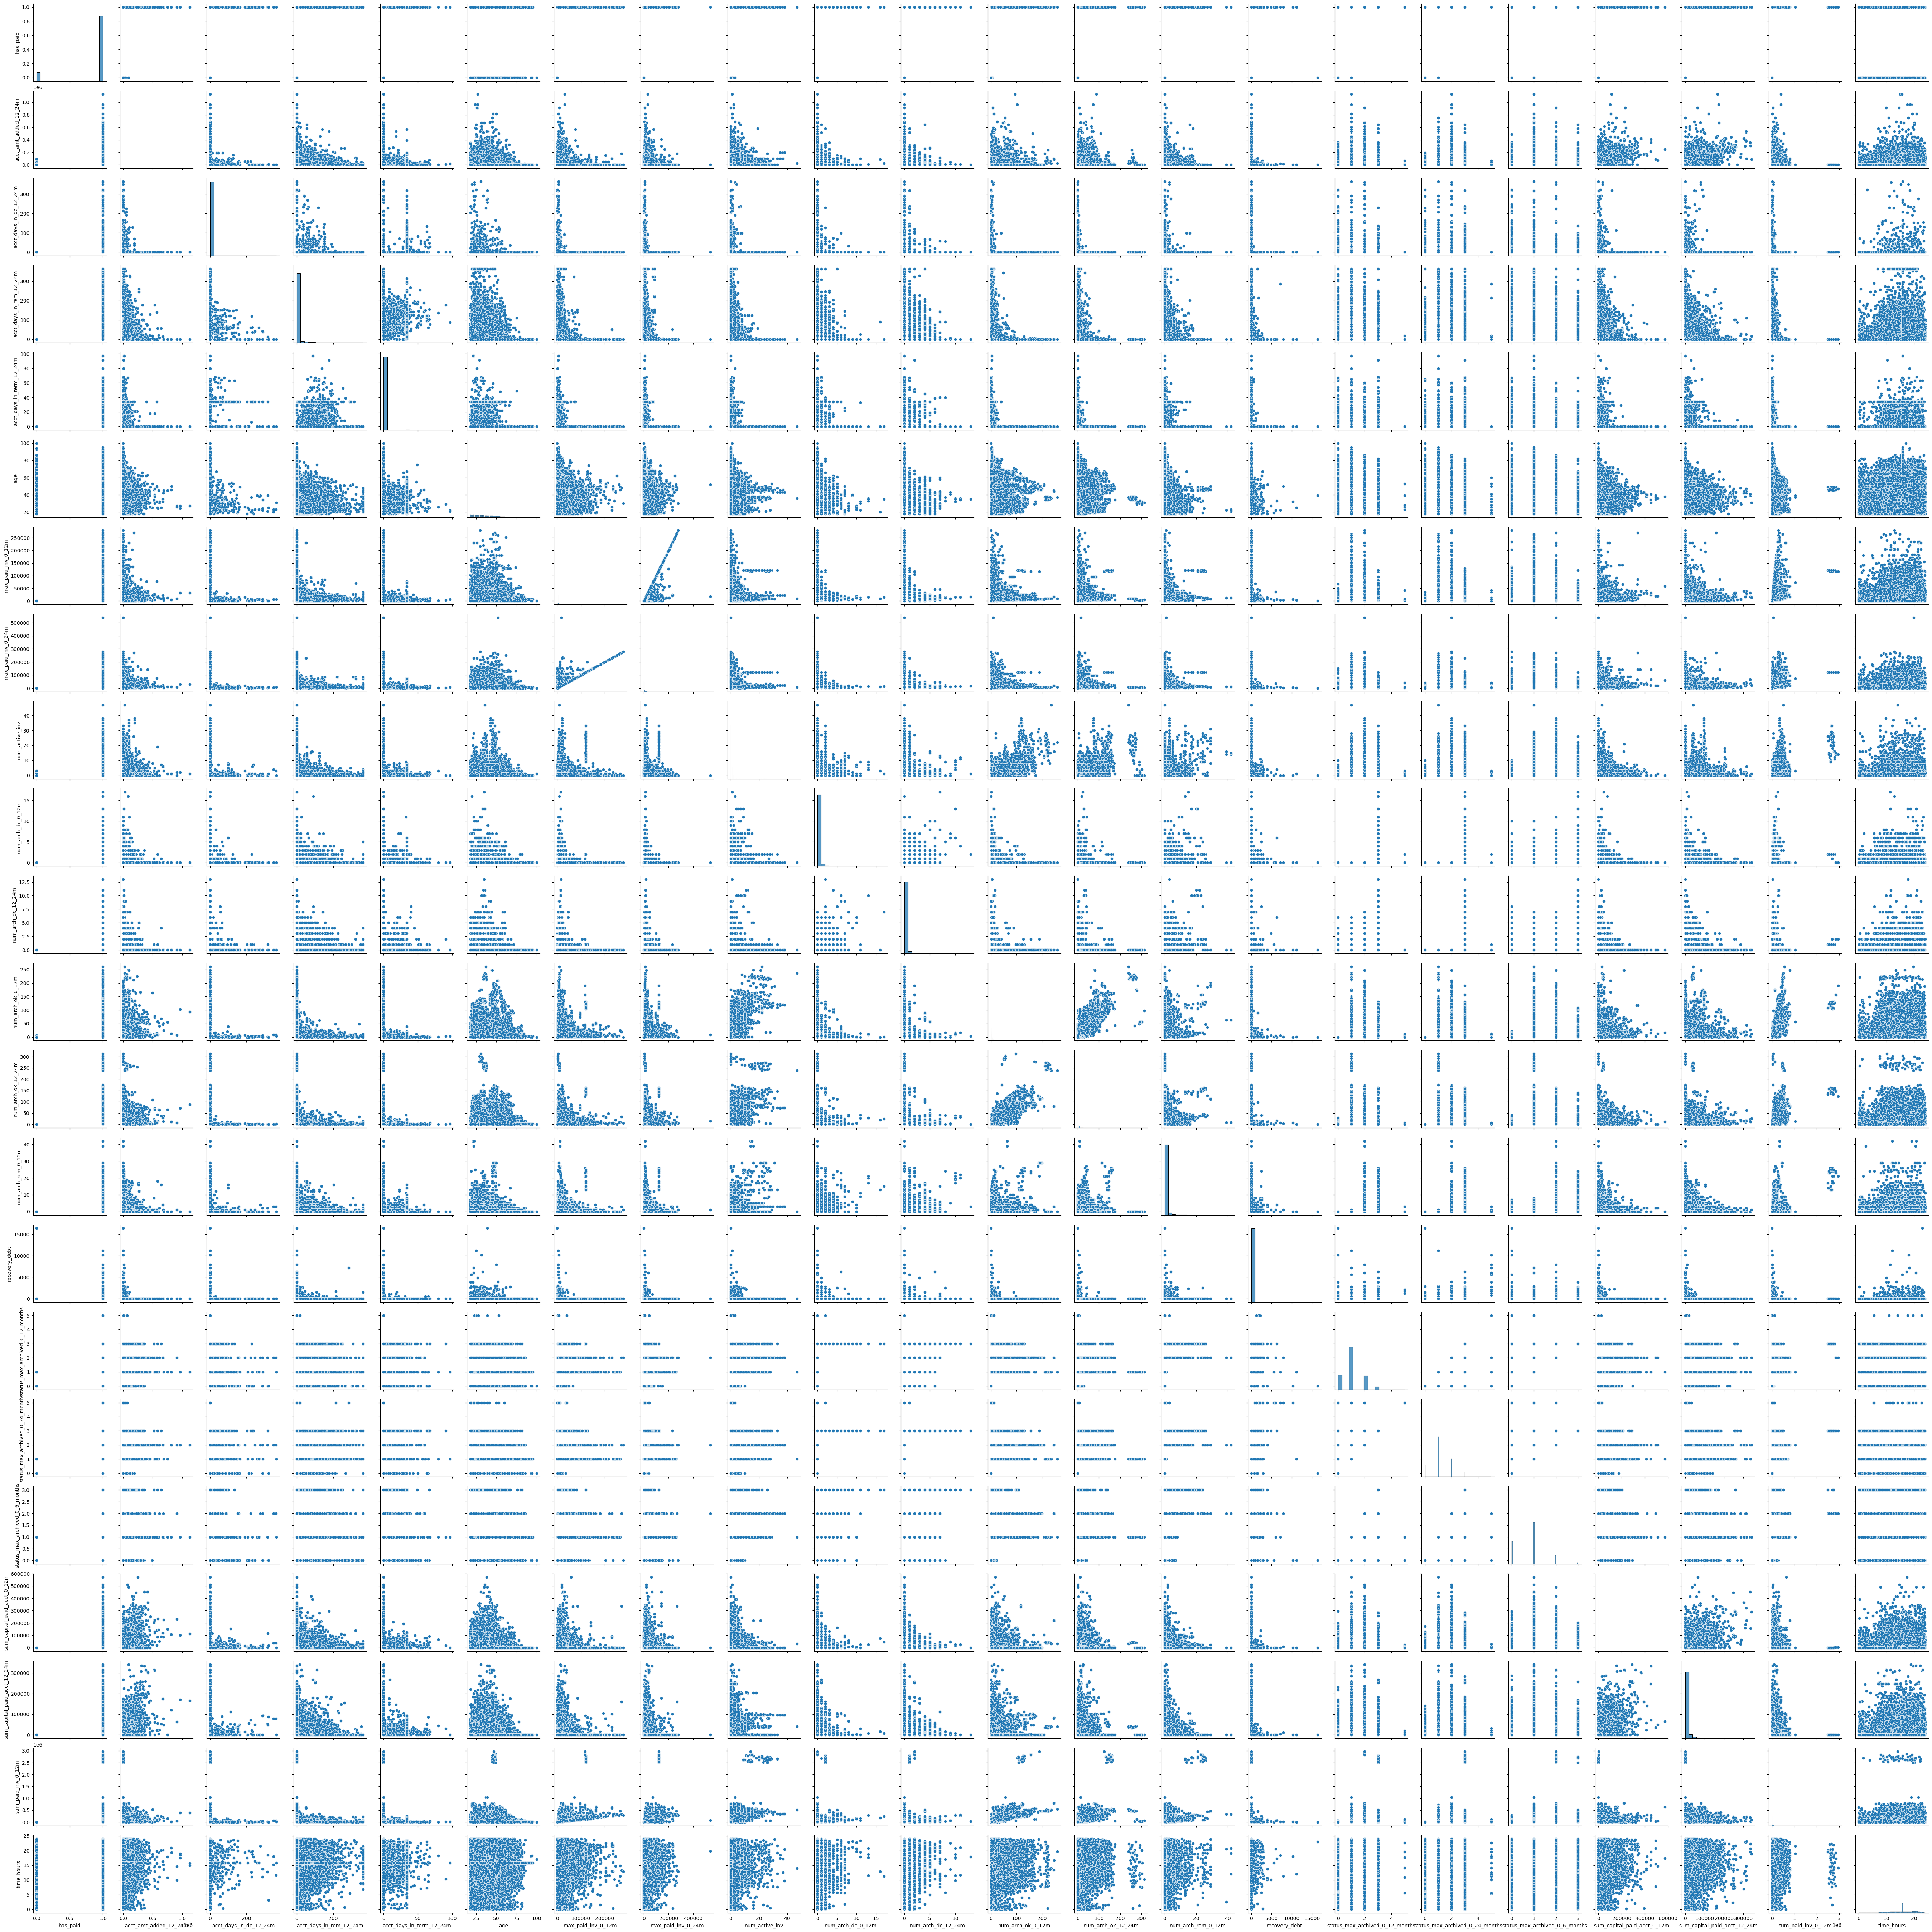

In [71]:
sns.pairplot(data=df_X)

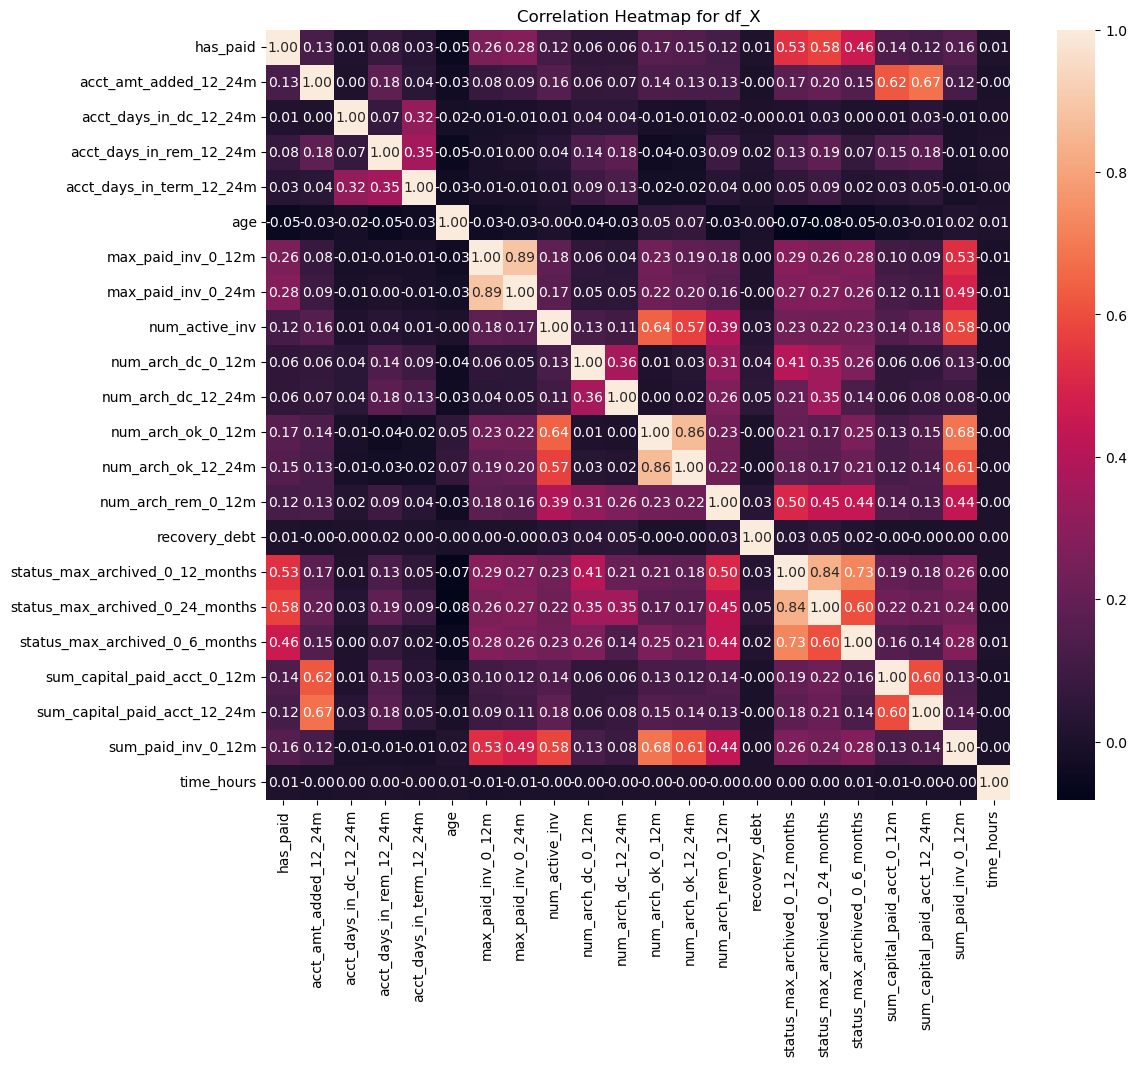

In [72]:
plt.figure(figsize=(12,10))
sns.heatmap(df_X.corr(), annot=True, fmt=".2f")
plt.title('Correlation Heatmap for df_X')
plt.show()

In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df_X), columns = df_X.columns)

In [74]:
scaled_df

has_paid  acct_amt_added_12_24m  acct_days_in_dc_12_24m  \
0      0.368273              -0.345395               -0.036054   
1      0.368273              -0.345395               -0.036054   
2      0.368273              -0.345395               -0.036054   
3      0.368273              -0.345395               -0.036054   
4      0.368273              -0.345395               -0.036054   
...         ...                    ...                     ...   
99972  0.368273              -0.345395               -0.036054   
99973  0.368273               0.941795               -0.036054   
99974  0.368273               1.235782               -0.036054   
99975  0.368273              -0.345395               -0.036054   
99976  0.368273              -0.345395               -0.036054   

       acct_days_in_rem_12_24m  acct_days_in_term_12_24m       age  \
0                    -0.206570                 -0.091889 -1.231909   
1                    -0.206570                 -0.091889  1.075575   
2                    -0.206570                 -0.091889 -1.078076   
3                    -0.206570                 -0.091889 -0.001251   
4                    -0.206570                 -0.091889 -0.847328   
...                        ...                       ...       ...   
99972                -0.206570                 -0.091889  0.614078   
99973                 0.722388                 -0.091889 -0.924244   
99974                -0.206570                 -0.091889 -0.385831   
99975                -0.206570                 -0.091889  0.383330   
99976                -0.206570                 -0.091889 -0.155083   

       max_paid_inv_0_12m  max_paid_inv_0_24m  num_active_inv  \
0                1.749394            1.412664        0.942181   
1                0.366352            0.187493       -0.363591   
2                1.614252            1.292948        0.289295   
3                2.398973            1.988095        0.289295   
4               -0.147698           -0.267880       -0.363591   
...                   ...                 ...             ...   
99972           -0.330156           -0.429510       -0.363591   
99973           -0.603842           -0.671955       -0.363591   
99974            0.463070            0.273171       -0.363591   
99975            0.327464            0.260637       -0.363591   
99976           -0.219599           -0.225418       -0.363591   

       num_arch_dc_0_12m  ...  num_arch_ok_12_24m  num_arch_rem_0_12m  \
0              -0.154327  ...            0.504774           -0.324954   
1              -0.154327  ...            0.833049            1.939118   
2              -0.154327  ...           -0.414394            1.939118   
3              -0.154327  ...            0.964358           -0.324954   
4              -0.154327  ...           -0.414394           -0.324954   
...                  ...  ...                 ...                 ...   
99972          -0.154327  ...           -0.217429           -0.324954   
99973          -0.154327  ...           -0.414394           -0.324954   
99974          -0.154327  ...           -0.348739           -0.324954   
99975          -0.154327  ...           -0.283084            0.429737   
99976          -0.154327  ...           -0.283084           -0.324954   

       recovery_debt  status_max_archived_0_12_months  \
0          -0.029233                        -0.090091   
1          -0.029233                         1.274815   
2          -0.029233                         1.274815   
3          -0.029233                        -0.090091   
4          -0.029233                        -0.090091   
...              ...                              ...   
99972      -0.029233                        -0.090091   
99973      -0.029233                        -1.454997   
99974      -0.029233                        -0.090091   
99975      -0.029233                         1.274815   
99976      -0.029233                        -0.090091   

       status_max_archived_0_2

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(scaled_df):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = scaled_df.columns
    vif["VIF"] = [variance_inflation_factor(scaled_df.values, i) for i in range(scaled_df.shape[1])]

    return(vif)

In [76]:
calc_vif(scaled_df).sort_values(by = 'VIF', ascending = False)

variables       VIF
11                num_arch_ok_0_12m  5.398529
15  status_max_archived_0_12_months  5.323043
6                max_paid_inv_0_12m  5.209588
7                max_paid_inv_0_24m  4.839512
16  status_max_archived_0_24_months  4.397800
12               num_arch_ok_12_24m  4.048149
20               sum_paid_inv_0_12m  3.227103
17   status_max_archived_0_6_months  2.277198
1             acct_amt_added_12_24m  2.154620
19     sum_capital_paid_acct_12_24m  2.061729
8                    num_active_inv  1.984793
13               num_arch_rem_0_12m  1.876782
18      sum_capital_paid_acct_0_12m  1.828353
0                          has_paid  1.752470
9                 num_arch_dc_0_12m  1.422306
10               num_arch_dc_12_24m  1.371009
4          acct_days_in_term_12_24m  1.277314
3           acct_days_in_rem_12_24m  1.233996
2            acct_days_in_dc_12_24m  1.118476
5                               age  1.018101
14                    recovery_debt  1.006133
21                       time_hours  1.000291

In [77]:
scaled_df = scaled_df.drop('status_max_archived_0_12_months', axis = 1)

In [78]:
def calc_vif1(scaled_df):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = scaled_df.columns
    vif["VIF"] = [variance_inflation_factor(scaled_df.values, i) for i in range(scaled_df.shape[1])]

    return(vif)

In [79]:
calc_vif1(scaled_df).sort_values(by = 'VIF', ascending = False)

variables       VIF
11                num_arch_ok_0_12m  5.381484
6                max_paid_inv_0_12m  5.143059
7                max_paid_inv_0_24m  4.811322
12               num_arch_ok_12_24m  4.046270
19               sum_paid_inv_0_12m  3.207544
15  status_max_archived_0_24_months  2.588410
1             acct_amt_added_12_24m  2.154569
18     sum_capital_paid_acct_12_24m  2.061729
8                    num_active_inv  1.982605
16   status_max_archived_0_6_months  1.857697
17      sum_capital_paid_acct_0_12m  1.828351
13               num_arch_rem_0_12m  1.802395
0                          has_paid  1.738057
9                 num_arch_dc_0_12m  1.321095
10               num_arch_dc_12_24m  1.305544
4          acct_days_in_term_12_24m  1.277244
3           acct_days_in_rem_12_24m  1.233919
2            acct_days_in_dc_12_24m  1.118213
5                               age  1.018084
14                    recovery_debt  1.005610
20                       time_hours  1.000290

In [80]:
scaled_df = scaled_df.drop('num_arch_ok_0_12m', axis = 1)

In [81]:
def calc_vif2(scaled_df):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = scaled_df.columns
    vif["VIF"] = [variance_inflation_factor(scaled_df.values, i) for i in range(scaled_df.shape[1])]

    return(vif)

In [82]:
calc_vif2(scaled_df).sort_values(by = 'VIF', ascending = False)

variables       VIF
6                max_paid_inv_0_12m  5.142890
7                max_paid_inv_0_24m  4.789474
18               sum_paid_inv_0_12m  2.836393
14  status_max_archived_0_24_months  2.588409
1             acct_amt_added_12_24m  2.154553
17     sum_capital_paid_acct_12_24m  2.061093
11               num_arch_ok_12_24m  1.952942
8                    num_active_inv  1.828507
16      sum_capital_paid_acct_0_12m  1.828343
15   status_max_archived_0_6_months  1.822275
12               num_arch_rem_0_12m  1.751764
0                          has_paid  1.737583
9                 num_arch_dc_0_12m  1.310976
10               num_arch_dc_12_24m  1.303710
4          acct_days_in_term_12_24m  1.277198
3           acct_days_in_rem_12_24m  1.232995
2            acct_days_in_dc_12_24m  1.118189
5                               age  1.017949
13                    recovery_debt  1.005568
19                       time_hours  1.000290

In [83]:
scaled_df = scaled_df.drop('max_paid_inv_0_12m', axis = 1)

In [84]:
def calc_vif3(scaled_df):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = scaled_df.columns
    vif["VIF"] = [variance_inflation_factor(scaled_df.values, i) for i in range(scaled_df.shape[1])]

    return(vif)

In [85]:
calc_vif3(scaled_df).sort_values(by = 'VIF', ascending = False)

variables       VIF
17               sum_paid_inv_0_12m  2.624951
13  status_max_archived_0_24_months  2.588142
1             acct_amt_added_12_24m  2.154486
16     sum_capital_paid_acct_12_24m  2.061092
10               num_arch_ok_12_24m  1.910522
15      sum_capital_paid_acct_0_12m  1.827783
7                    num_active_inv  1.826995
14   status_max_archived_0_6_months  1.799318
11               num_arch_rem_0_12m  1.745949
0                          has_paid  1.737563
6                max_paid_inv_0_24m  1.485994
8                 num_arch_dc_0_12m  1.310772
9                num_arch_dc_12_24m  1.303577
4          acct_days_in_term_12_24m  1.277195
3           acct_days_in_rem_12_24m  1.232833
2            acct_days_in_dc_12_24m  1.118181
5                               age  1.017561
12                    recovery_debt  1.005538
18                       time_hours  1.000263

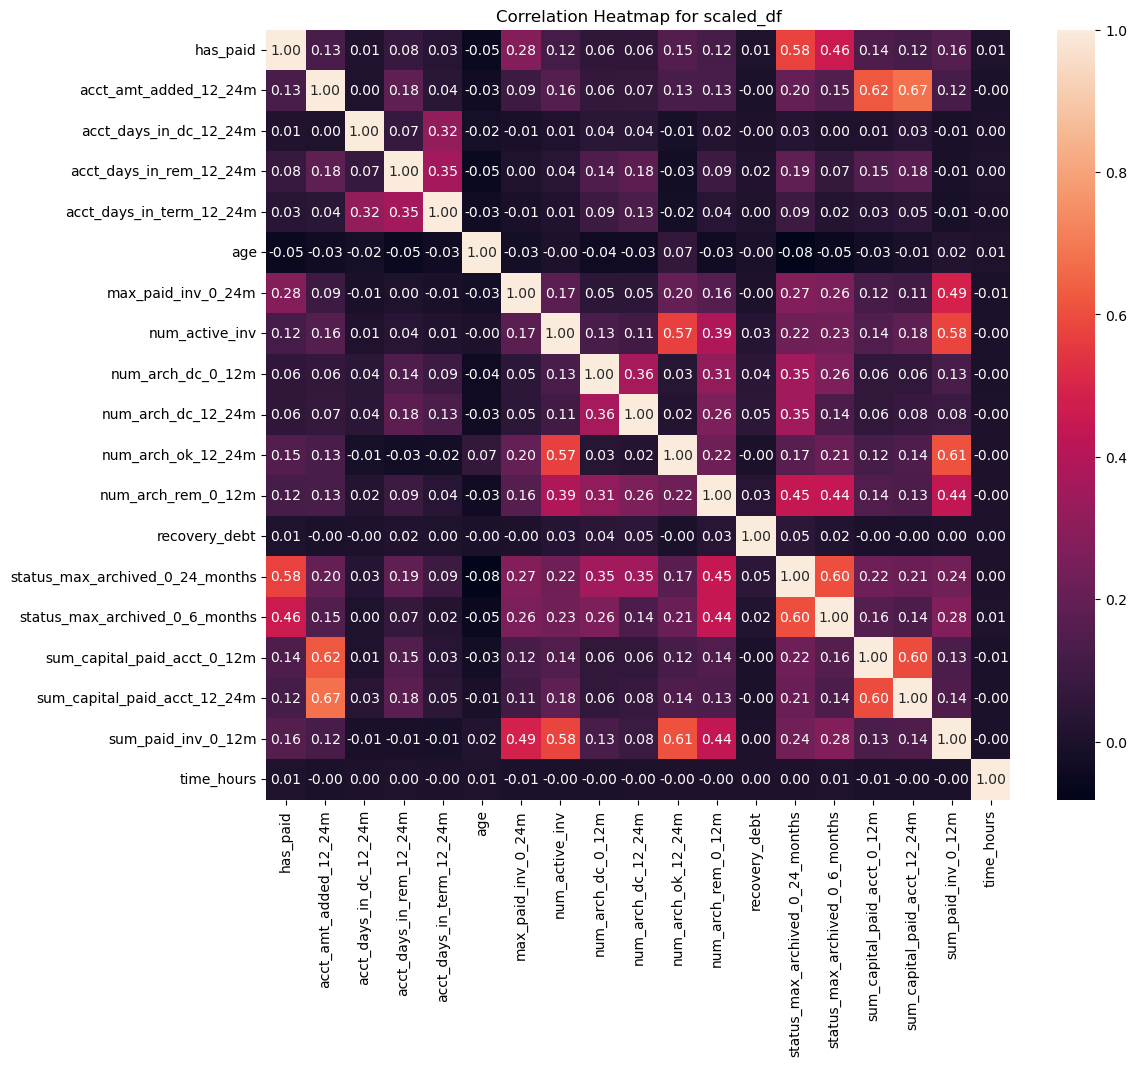

In [86]:
plt.figure(figsize=(12,10))
sns.heatmap(scaled_df.corr(), annot=True, fmt=".2f")
plt.title('Correlation Heatmap for scaled_df')
plt.show()

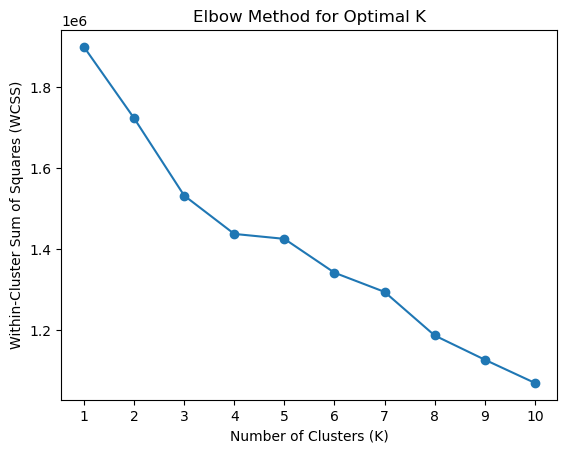

In [87]:
from sklearn.cluster import KMeans
wcss = []

k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(k_values)
plt.show()


In [88]:
k_means=KMeans(n_clusters=3, random_state = 123)
k_means.fit(scaled_df)
clusters = k_means.labels_

In [89]:
df.insert(0,'Clusters', clusters)

In [90]:
df.Clusters.value_counts().sort_index()

Clusters
0    11940
1    75497
2    12540
Name: count, dtype: int64

In [91]:
Freq = df.groupby('merchant_group')['Clusters'].value_counts().sort_index()
Freq

merchant_group         Clusters
Automotive Products    0             264
                       1             598
                       2              75
Children Products      0             837
                       1            3384
                       2             887
Clothing & Shoes       0            2213
                       1           11819
                       2            2696
Electronics            0             664
                       1            2012
                       2             358
Entertainment          0            5193
                       1           37129
                       2            6457
Erotic Materials       0             184
                       1             484
                       2              79
Food & Beverage        0              80
                       1             219
                       2              56
Health & Beauty        0            1158
                       1            5158
                       2 

In [ ]:
df_sub = df[['merchant_group','Clusters','age', 'default']]
df_sub.head()

In [ ]:
Freq = df_sub.groupby('default').Clusters.value_counts().sort_index()
Freq

In [ ]:
s = df_sub.groupby(['merchant_group','Clusters']).mean()
s.insert(0,'Frequency', Freq)
s